In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.6 MB/s eta 0:00:00


✅ KNN Regression: MAE = 0.0195, R² = 0.9220
✅ Decision Tree: MAE = 0.0063, R² = 0.9912
✅ Random Forest: MAE = 0.0058, R² = 0.9929
✅ Gradient Boosting: MAE = 0.0187, R² = 0.9382
✅ Extra Trees: MAE = 0.0046, R² = 0.9921
✅ XGBoost: MAE = 0.0068, R² = 0.9901
               Model       MAE        R²
4        Extra Trees  0.004646  0.992117
2      Random Forest  0.005787  0.992887
1      Decision Tree  0.006254  0.991197
5            XGBoost  0.006835  0.990132
3  Gradient Boosting  0.018748  0.938168
0     KNN Regression  0.019523  0.922047


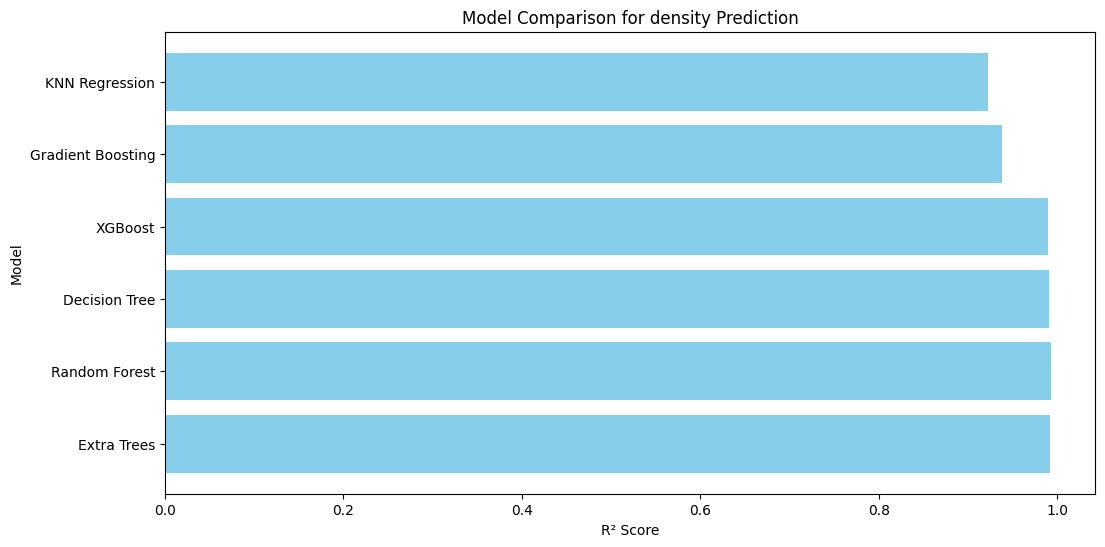

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
file_path = "/content/density.csv"
df = pd.read_csv(file_path)

# Define input features and target
X = df.drop(columns=["density"])  # Drop target variable
y = df["density"]  # Target variable

# Check for missing values
if X.isnull().sum().any() or y.isnull().sum() > 0:
    print("Warning: Missing values detected. Consider handling them before training.")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {

    "KNN Regression": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
}

# Store results
results = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, r2))
    print(f"✅ {name}: MAE = {mae:.4f}, R² = {r2:.4f}")

# Convert results to DataFrame and sort by performance
df_results = pd.DataFrame(results, columns=["Model", "MAE", "R²"]).sort_values(by="MAE")
print(df_results)

# Plot Results
plt.figure(figsize=(12, 6))
plt.barh(df_results["Model"], df_results["R²"], color="skyblue")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.title("Model Comparison for density Prediction")
plt.show()


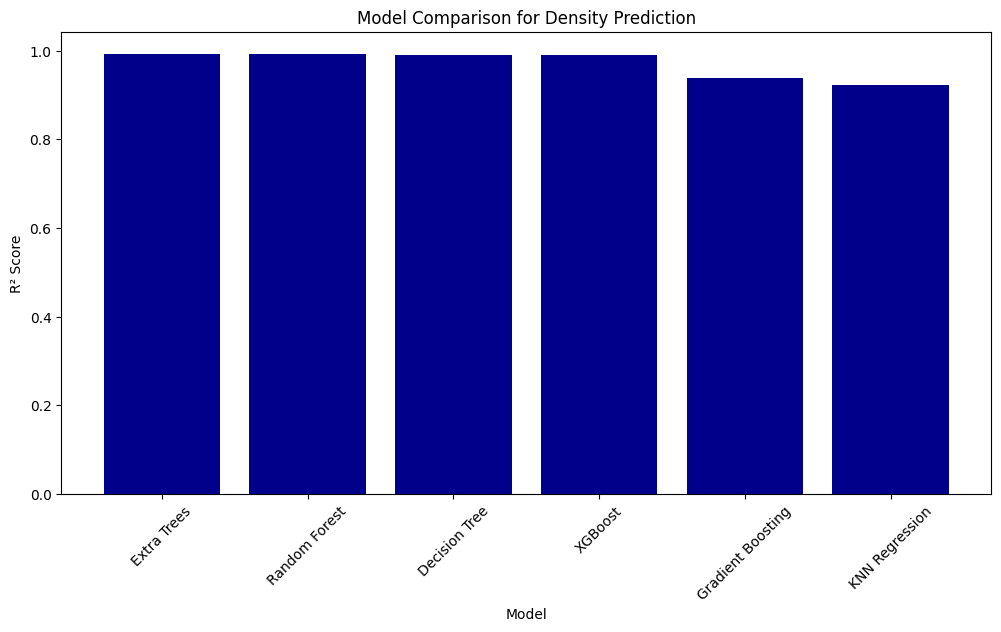

In [ ]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.bar(df_results["Model"], df_results["R²"], color="darkblue")  # Use plt.bar() for vertical bars
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Comparison for Density Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
import joblib

# Get the trained Extra Trees model from the 'models' dictionary
extra_trees_model = models["Extra Trees"]

# Now you can save it using joblib
joblib.dump(extra_trees_model, "/content/extratrees_density_model.pkl")

print("Extra Trees model saved successfully!")

Extra Trees model saved successfully!


In [ ]:
import pandas as pd

# Load experimental validation dataset
exp_validation_data = pd.read_csv("/content/expeimental validation .csv")

# Display first few rows
print(exp_validation_data.head())


   nHA  nHBDonA  nRotA  nRingA  nAromAtomA  nSpiroA  SLogPA     WPathA  WPolA  \
0   14        1      2       0           0        0 -3.3111  700000046      4   

   Zagreb1A  ...  nRot  nRing  nAromAtom  nSpiro   SLogP  WPath  WPol  \
0        28  ...     1      0          0       0 -0.6405     18     2   

   Zagreb1  Zagreb2  Temp  
0       16       14    25  

[1 rows x 27 columns]


In [ ]:
# Load your original dataset (used for training)
density_data = pd.read_csv("/content/density.csv")

# Get the feature columns (excluding target 'density')
feature_columns = density_data.drop(columns=["density"]).columns

# Check if the validation dataset has the same columns
missing_features = set(feature_columns) - set(exp_validation_data.columns)
if missing_features:
    print(f"⚠️ Missing features in validation data: {missing_features}")
else:
    print("✅ All features match!")

✅ All features match!


In [ ]:
# Load the trained Extra Trees model
model = joblib.load("/content/extratrees_density_model.pkl")

# Extract features for prediction
X_exp = exp_validation_data[feature_columns]

# Predict density
exp_validation_data["Predicted_Density"] = model.predict(X_exp)

# Save results
exp_validation_data.to_csv("/content/validated_results.csv", index=False)

print("✅ Predictions saved successfully! Check 'validated_results.csv'.")


✅ Predictions saved successfully! Check 'validated_results.csv'.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error

# Compute RMSE if actual density values are available
if "Actual_Density" in exp_validation_data.columns:
    rmse = mean_squared_error(exp_validation_data["Actual_Density"], exp_validation_data["Predicted_Density"], squared=False)
    print(f"📉 Root Mean Squared Error (RMSE): {rmse}")
else:
    print("⚠️ No actual density values found for validation.")


⚠️ No actual density values found for validation.


In [ ]:
X_exp = pd.read_csv("expeimental validation .csv", header=0)


In [ ]:
X_exp = X_exp.apply(pd.to_numeric, errors='coerce')
print(X_exp.dtypes)  # Check if any column is still 'object' (string)

nHA           float64
nHBDonA       float64
nRotA         float64
nRingA        float64
nAromAtomA    float64
nSpiroA       float64
SLogPA        float64
WPathA        float64
WPolA         float64
Zagreb1A      float64
Zagreb2A      float64
HBA MW        float64
HBAMF         float64
HBDMW         float64
HBDMF         float64
nH            float64
nHBDon        float64
nRot          float64
nRing         float64
nAromAtom     float64
nSpiro        float64
SLogP         float64
WPath         float64
WPol          float64
Zagreb1       float64
Zagreb2       float64
Temp          float64
dtype: object


In [ ]:
X_exp = X_exp.dropna()  # Drop rows with missing values

In [ ]:
predicted_density_rf = random_forest_model.predict(X_exp)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 📥 Load the training dataset
train_df = pd.read_csv("/content/density.csv")

# 📥 Load the experimental validation dataset
exp_df = pd.read_csv("/content/expeimental validation .csv")

# 🔍 Ensure the target column name is correct
target_column = "Density"  # Adjust this if needed
temperature_column = "Temp"  # Adjust this if necessary

# 🔹 Separate features (X) and target (y) in training data
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

# 🎯 Train the Random Forest model (with known high R²)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 🔍 Ensure experimental dataset has the same features as training data
X_exp = exp_df[X_train.columns]  # Keep only columns used during training

# 🔢 Predict density for the unknown combination
predicted_density = random_forest_model.predict(X_exp)

# 🔢 Add predicted density to the experimental dataset
exp_df["Predicted Density"] = predicted_density

# 📊 Visualization: Predicted Density across Temperatures
plt.figure(figsize=(8, 5))

# 🔹 Plot the predicted density curve
plt.plot(exp_df[temperature_column], exp_df["Predicted Density"], color="red", label="Predicted Density", linestyle="-", marker="o")

# 🔥 Graph Labels & Customization
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Predicted Density", fontsize=12)
plt.title("Predicted Density Across Temperatures", fontsize=14)
plt.legend()
plt.grid(True)

# 📌 Show the plot
plt.show()


KeyError: "['Density'] not found in axis"

In [ ]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("/content/density.csv")

# Display the column names
print(train_df.columns)


Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'density', 'Temp'],
      dtype='object')


In [ ]:
target_column = "Density (g/cm³)"


In [ ]:
target_column = "density"  # Use lowercase as found in dataset

# Remove the target column to get features (X) and target (y)
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]


In [ ]:
train_df.columns = train_df.columns.str.strip()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 🔹 Load training dataset
train_df = pd.read_csv("/content/density.csv")

# 🔹 Separate features (X) and target (y)
X_train = train_df.drop(columns=["density"])  # Features
y_train = train_df["density"]  # Target

# 🔹 Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Load experimental validation dataset
exp_df = pd.read_csv("/content/expeimental validation .csv")

# Convert all columns to numeric, replacing non-numeric values with NaN
exp_df = exp_df.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values (NaN)
exp_df = exp_df.dropna()

# Ensure that 'exp_df' contains only the features used during training:
exp_df = exp_df[X_train.columns]

# 🔹 Predict density for experimental dataset
predicted_density = rf_model.predict(exp_df)


# 🔹 Save results
exp_df.to_csv("/content/predicted_density.csv", index=False)
print("✅ Prediction complete! Check 'predicted_density.csv' for results.")


✅ Prediction complete! Check 'predicted_density.csv' for results.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 🔹 Load training dataset
train_df = pd.read_csv("/content/density.csv")

# 🔹 Separate features (X) and target (y)
X_train = train_df.drop(columns=["density"])  # Features
y_train = train_df["density"]  # Target

# 🔹 Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Load experimental validation dataset
exp_df = pd.read_csv("/content/expeimental validation .csv")

# Convert all columns to numeric, replacing non-numeric values with NaN
exp_df = exp_df.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values (NaN)
exp_df = exp_df.dropna()

# Ensure that 'exp_df' contains only the features used during training:
exp_df = exp_df[X_train.columns]

# 🔹 Predict density for experimental dataset
predicted_density = rf_model.predict(exp_df)


# 🔹 Save results
exp_df.to_csv("/content/predicted_density.csv", index=False)
print("✅ Prediction complete! Check 'predicted_density.csv' for results.")

✅ Prediction complete! Check 'predicted_density.csv' for results.


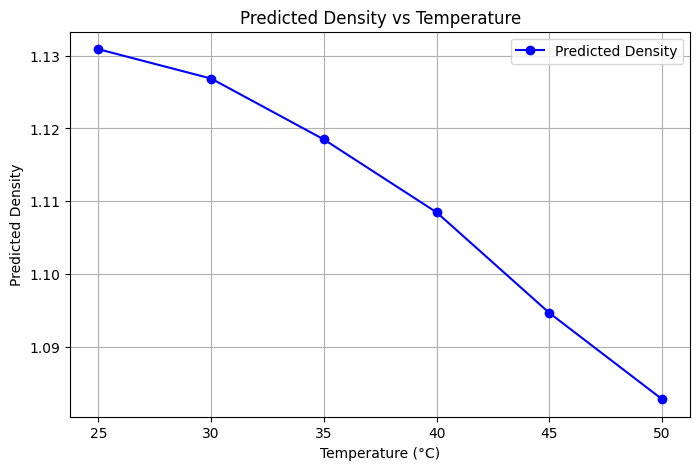

✅ Prediction complete! Check 'predicted_density.csv' for results.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 🔹 Load training dataset
train_df = pd.read_csv("/content/density.csv")

# 🔹 Separate features (X) and target (y)
X_train = train_df.drop(columns=["density"])
y_train = train_df["density"]

# 🔹 Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 Load experimental validation dataset
exp_df = pd.read_csv("/content/expeimental validation .csv")

# 🔹 Convert all columns to numeric (fixing errors)
exp_df = exp_df.apply(pd.to_numeric, errors='coerce')
exp_df = exp_df.dropna()  # Remove NaNs

# 🔹 Ensure the test dataset matches training features
X_exp = exp_df[X_train.columns]

# 🔹 Predict density
exp_df["Predicted Density"] = rf_model.predict(X_exp)

# 🔹 Sort by temperature for correct visualization
exp_df = exp_df.sort_values(by="Temp")

# 🔹 Visualization: Density vs Temperature
plt.figure(figsize=(8, 5))
plt.plot(exp_df["Temp"], exp_df["Predicted Density"], marker='o', linestyle='-', color='b', label="Predicted Density")
plt.xlabel("Temperature (°C)")
plt.ylabel("Predicted Density")
plt.title("Predicted Density vs Temperature")
plt.legend()
plt.grid()
plt.show()

# 🔹 Save results
exp_df.to_csv("/content/predicted_density.csv", index=False)
print("✅ Prediction complete! Check 'predicted_density.csv' for results.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("/content/expeimental validation .csv")

# 🔹 Ensure column names match your dataset
# Replace these with the actual column names if different
temperature_col = "Temp"
experimental_density_col = "Experimental Density"
predicted_density_col = "Predicted Density"

# 🔹 Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df[temperature_col], df[experimental_density_col], color='black', marker='s', label="Experimental", zorder=3)
plt.plot(df[temperature_col], df[predicted_density_col], color='red', linestyle='-', label="Model Prediction", linewidth=2, zorder=2)

# 🔹 Formatting the plot
plt.xlabel("Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Experimental vs Predicted Density")

# 🔹 Show the plot
plt.show()


KeyError: 'Experimental Density'

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("/content/expeimental validation .csv")

# 🔹 Print the available columns to check their exact names
print(df.columns)

# 🔹 Ensure column names match your dataset (Corrected if needed)
temperature_col = "Temp"
# experimental_density_col = "Experimental Density"  # Original (likely incorrect)
experimental_density_col = "Experimental Density"  # Corrected column name from the dataset
predicted_density_col = "Predicted Density"

# 🔹 Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df[temperature_col], df[experimental_density_col], color='black', marker='s', label="Experimental", zorder=3)
plt.plot(df[temperature_col], df[predicted_density_col], color='red', linestyle='-', label="Model Prediction", linewidth=2, zorder=2)

# 🔹 Formatting the plot
plt.xlabel("Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Experimental vs Predicted Density")

# 🔹 Show the plot
plt.show()

Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'Temp'],
      dtype='object')


KeyError: 'Experimental Density'

<Figure size 800x600 with 0 Axes>

Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'Temp',
       'Predicted Density', 'Experimental Density'],
      dtype='object')


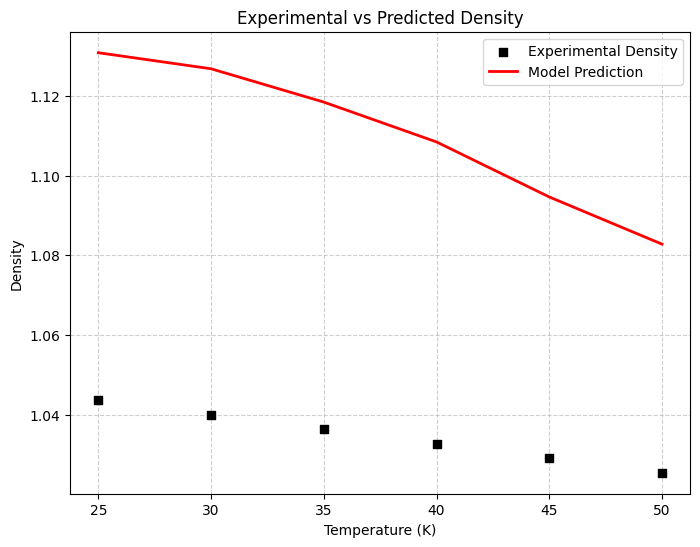

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Load the dataset
df = pd.read_csv("/content/predicted_density (2).csv")

# 🔹 Print the available columns to check their exact names
print(df.columns)

# 🔹 Ensure column names match your dataset (Corrected if needed)
temperature_col = "Temp"
# experimental_density_col = "Experimental Density"  # Original (likely incorrect)
experimental_density_col = "Experimental Density"  # Corrected based on your dataset

# Assuming "Predicted Density" is the correct column name for predictions
predicted_density_col = "Predicted Density"

# 🔹 Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df[temperature_col], df[experimental_density_col], color='black', marker='s', label="Experimental Density", zorder=3)
plt.plot(df[temperature_col], df[predicted_density_col], color='red', linestyle='-', label="Model Prediction", linewidth=2, zorder=2)

# 🔹 Formatting the plot
plt.xlabel("Temperature (K)")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Experimental vs Predicted Density")

# 🔹 Show the plot
plt.show()

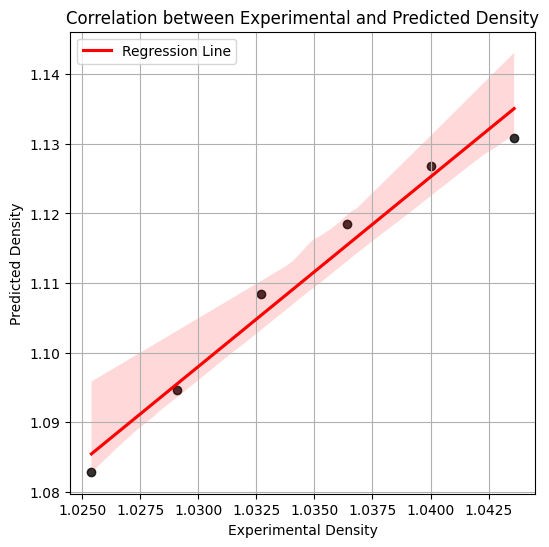

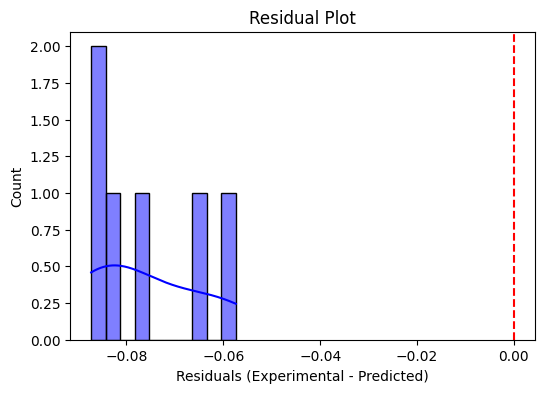

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Replace with actual column names
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# 1️⃣ Scatter Plot with Regression Line
plt.figure(figsize=(6, 6))
sns.regplot(x=experimental, y=predicted, scatter_kws={"color": "black", "label": "Data Points"}, line_kws={"color": "red", "label": "Regression Line"})
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()
plt.grid()
plt.show()


# 2️⃣ Residual Plot (Error Analysis)
residuals = experimental - predicted

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=10, color="blue")
plt.axvline(0, color='red', linestyle='--')  # Reference line at zero error
plt.xlabel("Residuals (Experimental - Predicted)")
plt.title("Residual Plot")
plt.show()


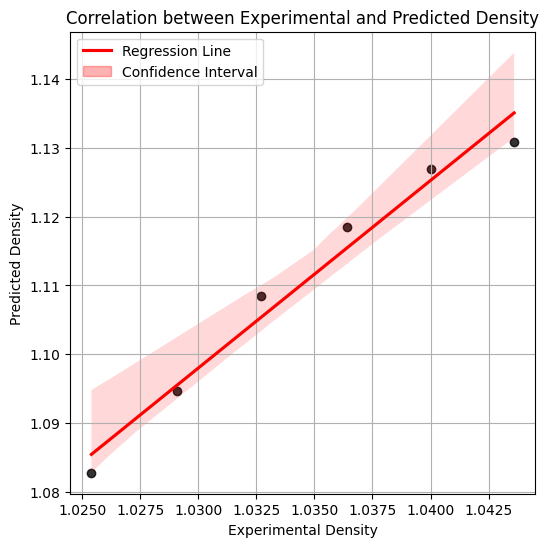

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Extract required columns
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# Create plot
plt.figure(figsize=(6, 6))
ax = sns.regplot(x=experimental, y=predicted,
                 scatter_kws={"color": "black", "label": "Data Points"},
                 line_kws={"color": "red", "label": "Regression Line"})

# Create a dummy legend for the confidence interval
plt.fill_between([], [], [], color="red", alpha=0.3, label="Confidence Interval")

# Labels and title
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()

# Show plot
plt.grid()
plt.show()


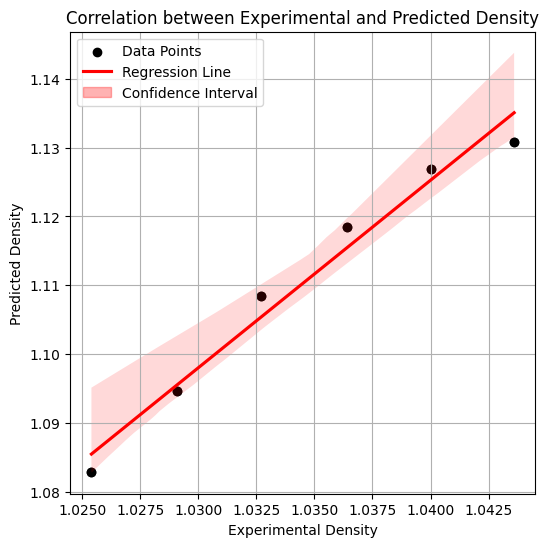

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Extract required columns
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# Create figure
plt.figure(figsize=(6, 6))

# Scatter plot (black dots)
plt.scatter(experimental, predicted, color="black", label="Data Points")

# Regression plot (with confidence interval)
ax = sns.regplot(x=experimental, y=predicted,
                 scatter_kws={"color": "black"},  # Keep scatter points black
                 line_kws={"color": "red", "label": "Regression Line"})

# Add confidence interval manually to legend
plt.fill_between([], [], [], color="red", alpha=0.3, label="Confidence Interval")

# Labels and title
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()

# Show plot
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128420 (\N{BLACK HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


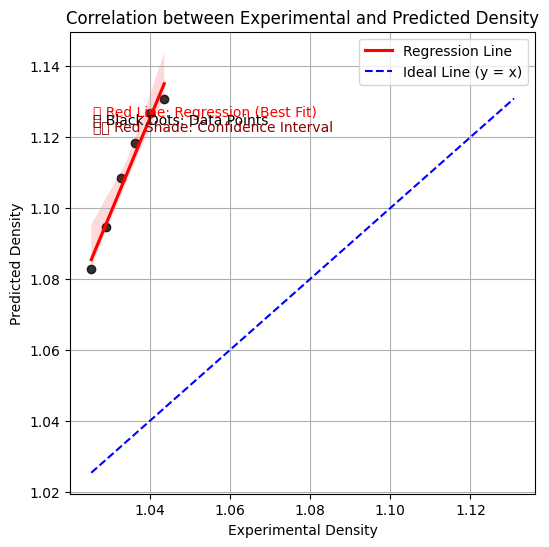

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Replace with actual column names
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# Create plot
plt.figure(figsize=(6, 6))
sns.regplot(x=experimental, y=predicted, scatter_kws={"color": "black", "label": "Data Points"},
            line_kws={"color": "red", "label": "Regression Line"})

# Ideal y = x line (Perfect Predictions)
min_val = min(min(experimental), min(predicted))
max_val = max(max(experimental), max(predicted))
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="blue", label="Ideal Line (y = x)")

# Labels and Title
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()

# Annotations to explain components
plt.text(min_val + 0.0005, max_val - 0.005, "🔴 Red Line: Regression (Best Fit)", color="red", fontsize=10)
plt.text(min_val + 0.0005, max_val - 0.007, "🖤 Black Dots: Data Points", color="black", fontsize=10)
plt.text(min_val + 0.0005, max_val - 0.009, "🔴📏 Red Shade: Confidence Interval", color="darkred", fontsize=10)

plt.grid()
plt.show()


In [ ]:
plt.figure(figsize=(6, 6))
sns.regplot(x=experimental, y=predicted, scatter_kws={"color": "black", "label": "Data Points"}, line_kws={"color": "red", "label": "Regression Line"})
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()
plt.grid()
plt.show()


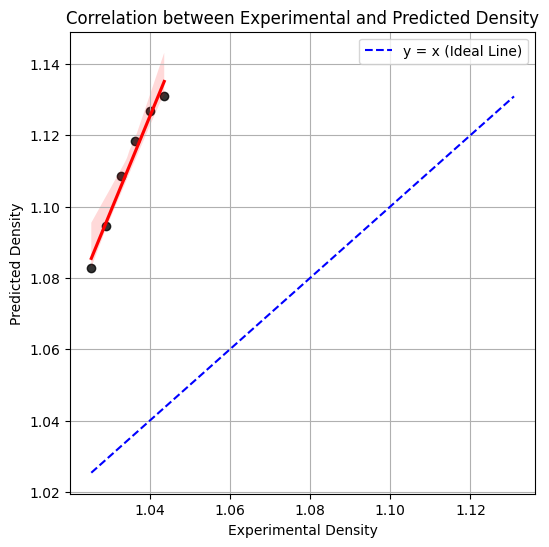

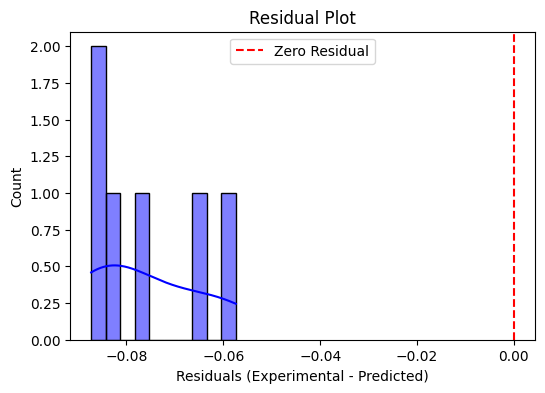

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Replace with actual column names
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# 1️⃣ Scatter Plot with Regression Line
plt.figure(figsize=(6, 6))
sns.regplot(x=experimental, y=predicted,
            scatter_kws={"color": "black"},  # Data points in black
            line_kws={"color": "red"})  # Regression line in red

# Add y = x reference line (Ideal Prediction Line)
min_val = min(min(experimental), min(predicted))
max_val = max(max(experimental), max(predicted))
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="blue", label="y = x (Ideal Line)")

plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Correlation between Experimental and Predicted Density")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Residual Plot (Error Analysis)
residuals = experimental - predicted

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=10, color="blue")
plt.axvline(0, color='red', linestyle='--', label="Zero Residual")  # Reference line at zero error
plt.xlabel("Residuals (Experimental - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.show()


(1.0254, 1.130882)

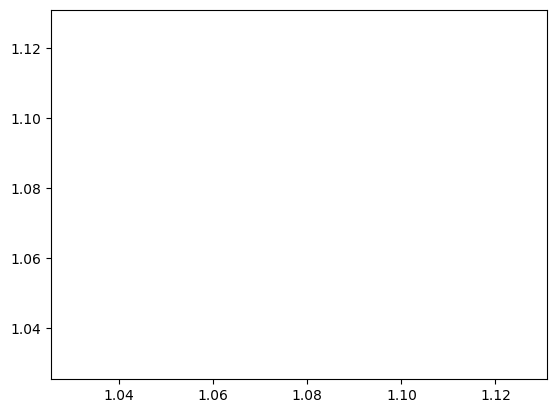

In [ ]:
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

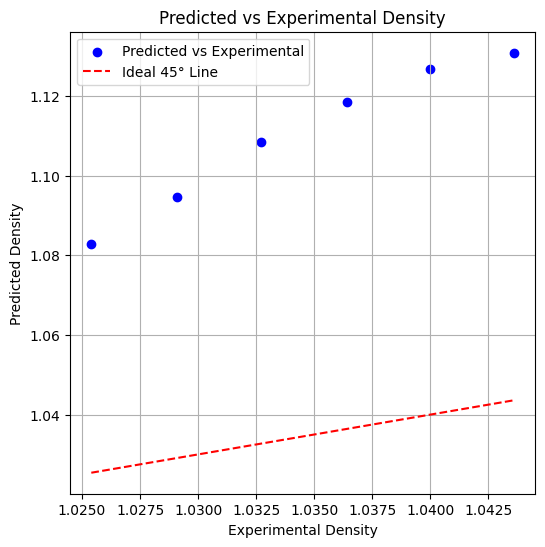

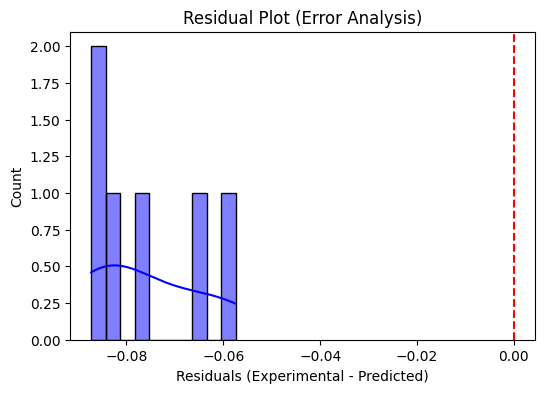

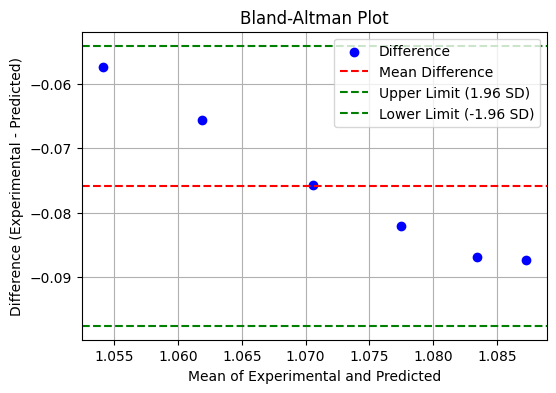

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("/content/predicted_density (2).csv")

# Replace with actual column names
experimental = df["Experimental Density"]
predicted = df["Predicted Density"]

# 1️⃣ Scatter Plot with 45° Reference Line
plt.figure(figsize=(6, 6))
plt.scatter(experimental, predicted, color='blue', label='Predicted vs Experimental')
plt.plot([min(experimental), max(experimental)], [min(experimental), max(experimental)], 'r--', label='Ideal 45° Line')
plt.xlabel("Experimental Density")
plt.ylabel("Predicted Density")
plt.title("Predicted vs Experimental Density")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Residual Plot (Experimental - Predicted)
residuals = experimental - predicted

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=10, color="blue")
plt.axvline(0, color='red', linestyle='--')  # Reference line at zero error
plt.xlabel("Residuals (Experimental - Predicted)")
plt.title("Residual Plot (Error Analysis)")
plt.show()

# 3️⃣ Bland-Altman Plot
mean_values = (experimental + predicted) / 2
diff_values = experimental - predicted  # Difference

mean_diff = np.mean(diff_values)
std_diff = np.std(diff_values)

plt.figure(figsize=(6, 4))
plt.scatter(mean_values, diff_values, color="blue", label="Difference")
plt.axhline(mean_diff, color="red", linestyle="--", label="Mean Difference")
plt.axhline(mean_diff + 1.96*std_diff, color="green", linestyle="--", label="Upper Limit (1.96 SD)")
plt.axhline(mean_diff - 1.96*std_diff, color="green", linestyle="--", label="Lower Limit (-1.96 SD)")
plt.xlabel("Mean of Experimental and Predicted")
plt.ylabel("Difference (Experimental - Predicted)")
plt.title("Bland-Altman Plot")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("/content/predicted_density (2).csv")
print(df.columns)
print(df.head())  # Check the first few rows


Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'Temp',
       'Predicted Density', 'Experimental Density'],
      dtype='object')
   nHA  nHBDonA  nRotA  nRingA  nAromAtomA  nSpiroA  SLogPA     WPathA  WPolA  \
0   14        1      2       0           0        0 -3.3111  700000046      4   
1   14        1      2       0           0        0 -3.3111  700000046      4   
2   14        1      2       0           0        0 -3.3111  700000046      4   
3   14        1      2       0           0        0 -3.3111  700000046      4   
4   14        1      2       0           0        0 -3.3111  700000046      4   

   Zagreb1A  ...  nAromAtom  nSpiro   SLogP  WPath  WPol  Zagreb1  Zagreb2  \
0        28  ...          0       0 -0.6405     18     2       16   

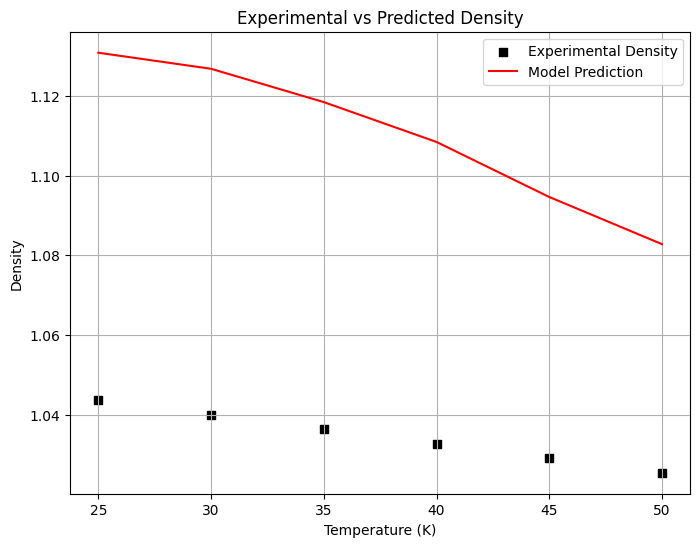

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("/content/predicted_density (2).csv")

# Replace with actual column names
temperature = df["Temp"]
exp_density = df["Experimental Density"]
pred_density = df["Predicted Density"]

# Normalize if needed (Uncomment if scale is mismatched)
# exp_density = (exp_density - exp_density.min()) / (exp_density.max() - exp_density.min())
# pred_density = (pred_density - pred_density.min()) / (pred_density.max() - pred_density.min())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(temperature, exp_density, color='black', marker='s', label="Experimental Density")
plt.plot(temperature, pred_density, color='red', label="Model Prediction")

plt.xlabel("Temperature (K)")
plt.ylabel("Density")
plt.title("Experimental vs Predicted Density")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/expeimental validation .csv")
print(df.columns)


Index(['nHA', 'nHBDonA', 'nRotA', 'nRingA', 'nAromAtomA', 'nSpiroA', 'SLogPA',
       'WPathA', 'WPolA', 'Zagreb1A', 'Zagreb2A', 'HBA MW', 'HBAMF', 'HBDMW',
       'HBDMF', 'nH', 'nHBDon', 'nRot', 'nRing', 'nAromAtom', 'nSpiro',
       'SLogP', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'Temp'],
      dtype='object')


In [ ]:
# 🔹 Load experimental validation dataset
exp_df = pd.read_csv("/content/predicted_density (2).csv ")

# Convert all columns to numeric, replacing non-numeric values with NaN
exp_df = exp_df.apply(pd.to_numeric, errors='coerce')

# Remove rows with missing values (NaN)
exp_df = exp_df.dropna()

# Ensure that 'exp_df' contains only the features used during training:
exp_df = exp_df[X_train.columns]

# 🔹 Predict density for experimental dataset
predicted_density = rf_model.predict(exp_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/predicted_density (2).csv '

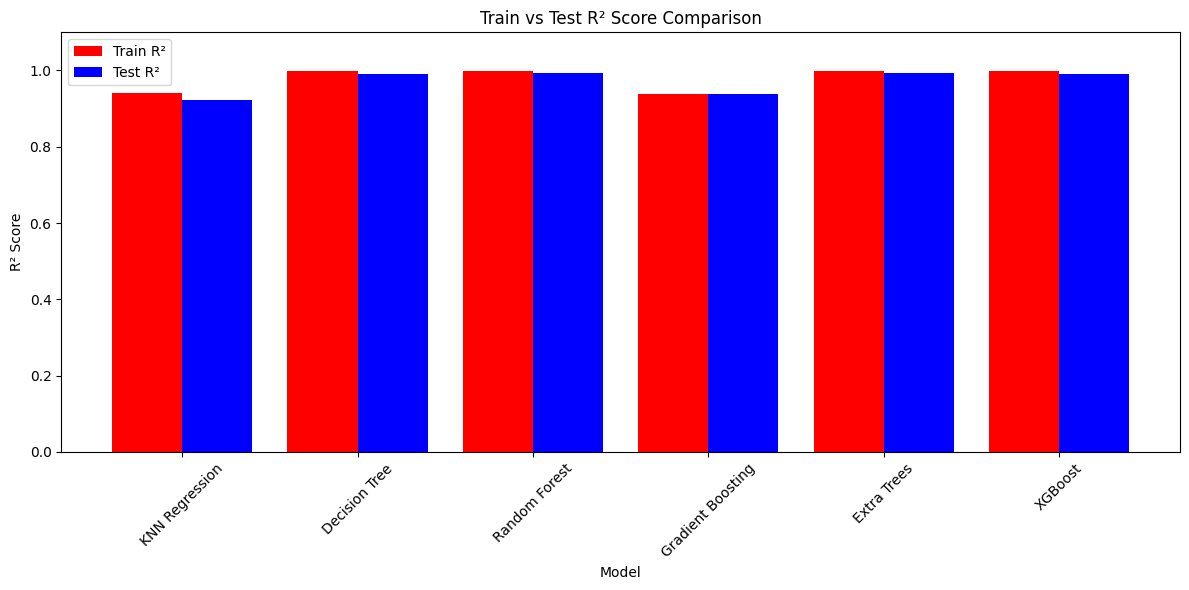

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Train and evaluate models separately for train and test R² scores
train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a grouped bar chart
x = np.arange(len(models))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_r2_scores, width, label="Train R²", color="red")
plt.bar(x + width/2, test_r2_scores, width, label="Test R²", color="blue")

# Labels and Formatting
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Train vs Test R² Score Comparison")
plt.xticks(x, models.keys(), rotation=45)
plt.legend()
plt.ylim(0, 1.1)  # Keep the scale from 0 to 1.1 for better visualization

# Show the plot
plt.tight_layout()
plt.show()

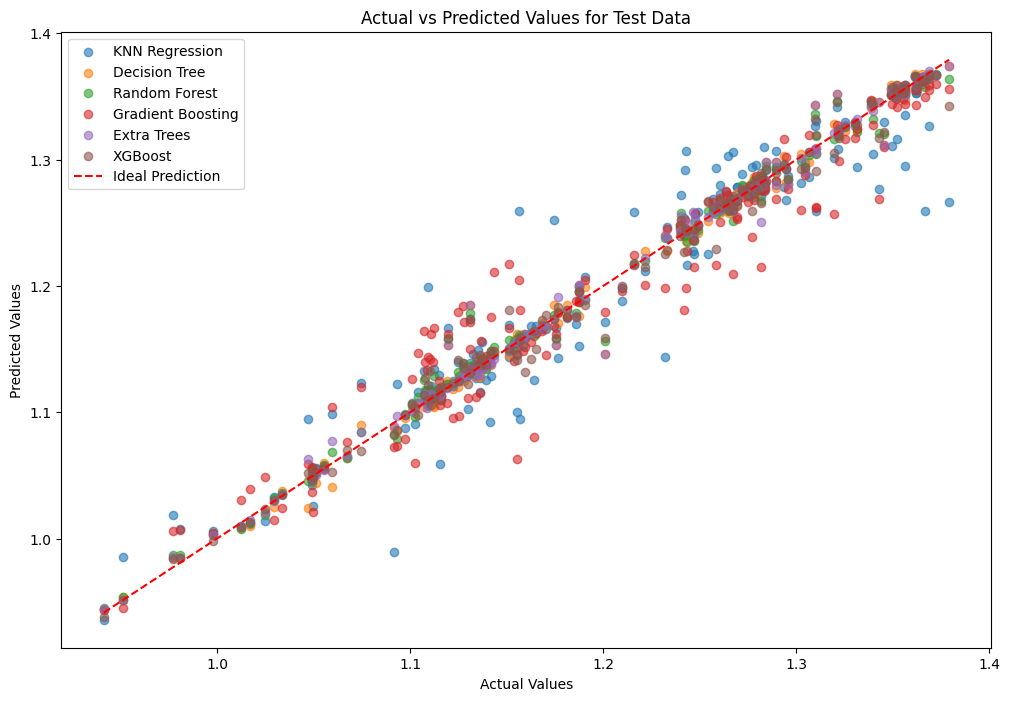


Test Data Performance Metrics:
               Model       MAE       MSE      RMSE        R²
4        Extra Trees  0.004741  0.000094  0.009670  0.991764
2      Random Forest  0.005825  0.000084  0.009153  0.992622
1      Decision Tree  0.006292  0.000100  0.010023  0.991152
5            XGBoost  0.006835  0.000112  0.010585  0.990132
3  Gradient Boosting  0.018748  0.000702  0.026496  0.938168
0     KNN Regression  0.019523  0.000885  0.029750  0.922047


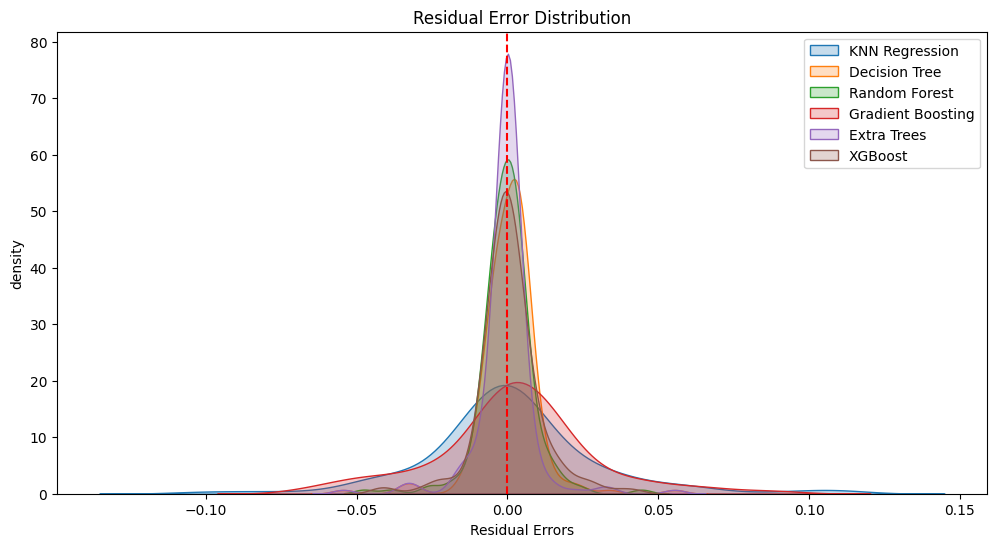

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to analyze test data predictions
def evaluate_models(models, X_test, y_test):
    results = []

    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Compute Metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append((name, mae, mse, rmse, r2))

        # Scatter plot of Actual vs Predicted
        plt.scatter(y_test, y_pred, alpha=0.6, label=name)

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Ideal Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values for Test Data")
    plt.legend()
    plt.show()

    # Convert results to DataFrame and display
    df_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"]).sort_values(by="MAE")
    print("\nTest Data Performance Metrics:")
    print(df_results)

    # Residual Errors Plot
    plt.figure(figsize=(12, 6))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        sns.kdeplot(residuals, label=name, fill=True)

    plt.axvline(0, color='red', linestyle="--")
    plt.xlabel("Residual Errors")
    plt.ylabel("density")
    plt.title("Residual Error Distribution")
    plt.legend()
    plt.show()

# Call the function to analyze test data
evaluate_models(models, X_test, y_test)

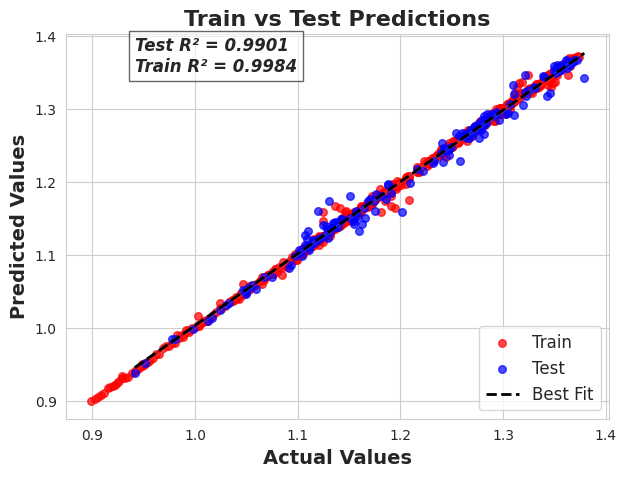

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for train and test data
plt.scatter(y_train, y_train_pred, color="red", label="Train", alpha=0.7, s=30)
plt.scatter(y_test, y_test_pred, color="blue", label="Test", alpha=0.7, s=30)

# Best-fit regression line
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color="black", line_kws={"linestyle": "--", "linewidth": 2}, label="Best Fit")

# Labels and title
plt.xlabel("Actual Values", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Values", fontsize=14, fontweight='bold')
plt.title("Train vs Test Predictions", fontsize=16, fontweight='bold')

# Compute R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display R² values on the plot (formatted properly)
plt.text(min(y_test), max(y_test)*0.98, f"Test R² = {test_r2:.4f}\nTrain R² = {train_r2:.4f}",
         fontsize=12, fontweight="bold", ha="left", style="italic", bbox=dict(facecolor="white", alpha=0.6, edgecolor="black"))

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

Pearson Correlation with density:
 density       1.000000
nHBDon        0.481523
nRing         0.337211
HBAMF         0.260390
WPol          0.183141
Zagreb2       0.150736
Zagreb1       0.114765
HBDMW         0.059939
nRingA        0.058839
nHBDonA       0.054675
WPath         0.026642
WPathA       -0.039140
nH           -0.059827
Temp         -0.069877
nRot         -0.084962
nAromAtom    -0.094407
WPolA        -0.101104
nHA          -0.137779
Zagreb2A     -0.144160
nAromAtomA   -0.152418
Zagreb1A     -0.175011
nRotA        -0.190598
HBA MW       -0.196013
SLogPA       -0.205427
HBDMF        -0.272633
SLogP        -0.534033
nSpiroA            NaN
nSpiro             NaN
Name: density, dtype: float64

Spearman Correlation with density:
 density       1.000000
nHBDon        0.562556
nRing         0.327412
HBAMF         0.252202
WPol          0.236412
Zagreb2       0.206804
Zagreb1       0.169898
HBDMW         0.081318
nHBDonA       0.071825
WPath         0.035526
nRingA        0.029301
H

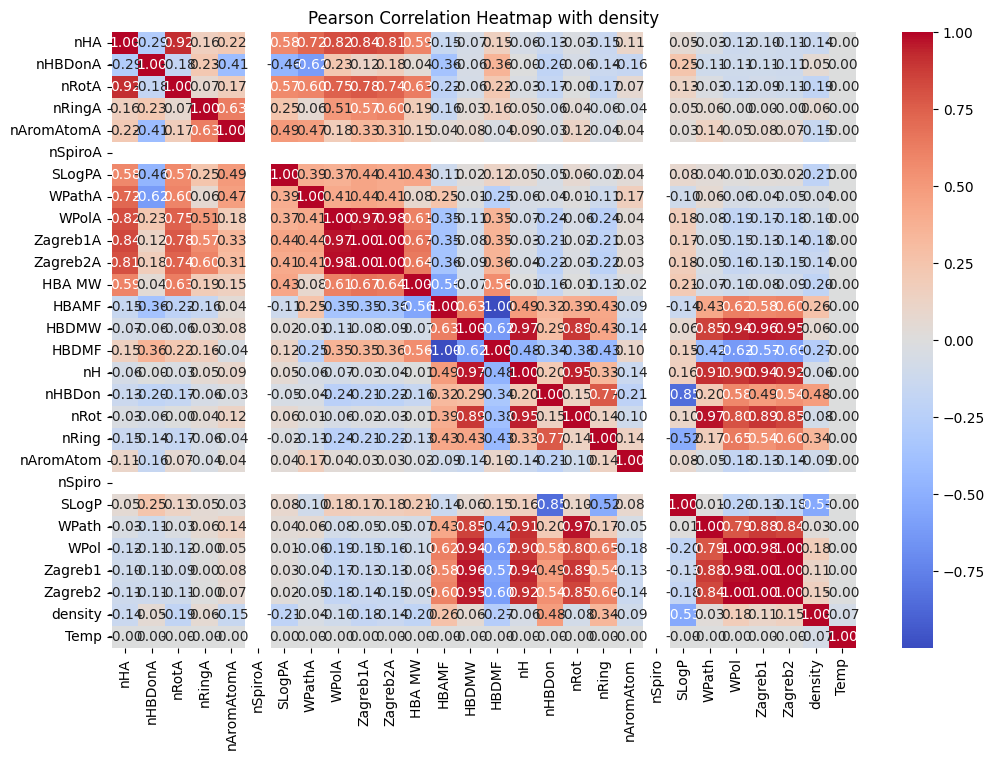

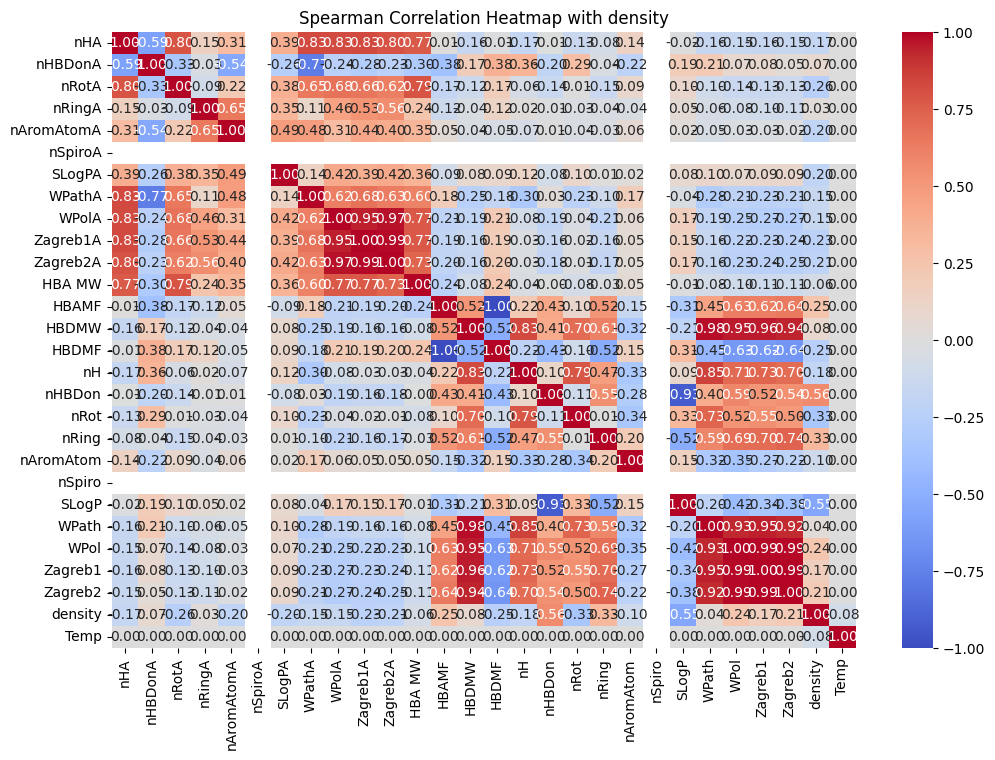

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/density.csv"
df = pd.read_csv(file_path)

# **Change 'viscosity' to 'density' since you want to find correlations with density**
# Ensure 'density' is present in the dataset (which it should be since it's the target)
if 'density' not in df.columns:
    raise ValueError("The dataset must contain a column named 'density'.")

# **Compute Pearson and Spearman correlation with density (changed from viscosity)**
pearson_corr = df.corr(method='pearson')['density'].sort_values(ascending=False)
spearman_corr = df.corr(method='spearman')['density'].sort_values(ascending=False)

# Print the top correlated features
print("Pearson Correlation with density:\n", pearson_corr) # Changed from Viscosity to density
print("\nSpearman Correlation with density:\n", spearman_corr) # Changed from Viscosity to density

# Plot correlation heatmap (Pearson)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap with density")
plt.show()

# Plot correlation heatmap (Spearman)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap with density")
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display the first few rows
print(results_df.head())


     Actual  Predicted
695  1.0555   1.057682
816  1.2416   1.226561
30   1.3791   1.342579
599  1.2403   1.252415
96   1.2011   1.159003


In [ ]:
import pandas as pd

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Display all rows
pd.set_option("display.max_rows", None)  # Ensure all rows are printed
print(results_df)

     Actual  Predicted
695  1.0555   1.057682
816  1.2416   1.226561
30   1.3791   1.342579
599  1.2403   1.252415
96   1.2011   1.159003
244  1.2637   1.265799
558  1.0334   1.034107
352  1.2762   1.279695
464  1.2936   1.295814
543  1.0971   1.097672
447  1.1564   1.156357
254  1.2653   1.259709
250  1.1341   1.143519
65   1.3514   1.353769
668  1.1011   1.106530
215  1.3045   1.293942
39   1.2893   1.289390
192  1.2604   1.262009
86   1.3212   1.345824
493  1.2892   1.292005
670  1.1193   1.119711
196  1.3214   1.322269
209  1.3649   1.359825
212  1.2791   1.284706
738  1.2815   1.265307
275  1.0674   1.069706
120  1.1157   1.116151
292  1.1538   1.149106
139  1.0491   1.050556
291  1.1373   1.142624
836  0.9979   0.997807
63   1.2471   1.236717
618  1.1552   1.145467
66   1.3552   1.356054
533  1.2395   1.239224
518  1.1653   1.150334
334  1.3625   1.359573
328  1.2768   1.259301
239  1.1683   1.172897
417  1.0169   1.013085
651  1.1365   1.137280
650  1.3453   1.321827
67   1.3619

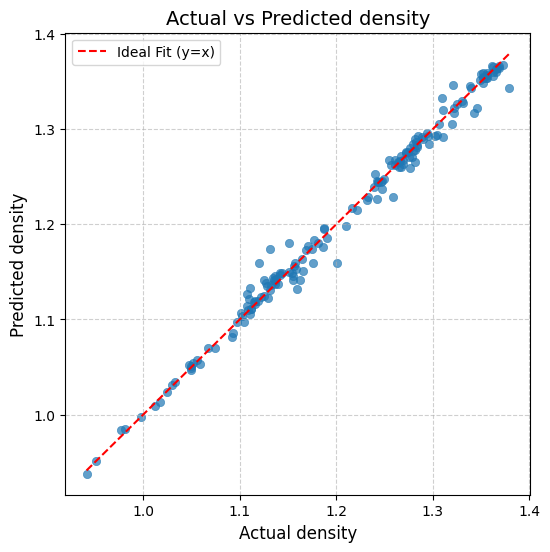

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure y_test and y_pred are available (replace with actual variables)
# y_test = actual viscosity values from dataset
# y_pred = predicted viscosity values from your regression model

# Scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)

# Reference diagonal line (Perfect Predictions)
x_vals = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_vals, x_vals, color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels and title
plt.xlabel("Actual density", fontsize=12)
plt.ylabel("Predicted density", fontsize=12)
plt.title("Actual vs Predicted density", fontsize=14)

# Show legend and plot
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


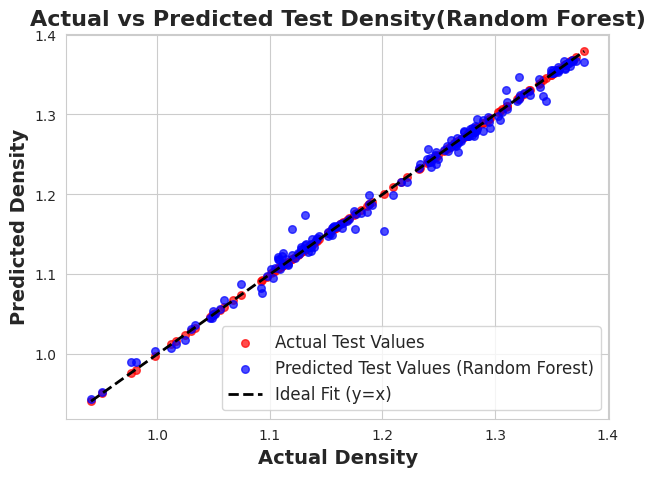

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Assuming these are the test set predictions and actual values for Random Forest
y_test_best = y_test  # Actual test values

# Get predictions for Random Forest (Assuming 'models' is defined from previous code)
rf_model = models["Random Forest"]
y_test_pred_best = rf_model.predict(X_test)  # Predicted test values from the Random Forest

# Create figure
plt.figure(figsize=(7, 5))

# Scatter plots for actual and predicted test values
plt.scatter(y_test_best, y_test_best, color="red", label="Actual Test Values", alpha=0.7, s=30)
plt.scatter(y_test_best, y_test_pred_best, color="blue", label="Predicted Test Values (Random Forest)", alpha=0.7, s=30)

# Reference diagonal line (Ideal Fit y=x)
x_vals = np.linspace(min(y_test_best), max(y_test_best), 100)
plt.plot(x_vals, x_vals, color="black", linestyle="--", linewidth=2, label="Ideal Fit (y=x)")

# Labels and title
plt.xlabel("Actual Density", fontsize=14, fontweight='bold')
plt.ylabel("Predicted Density", fontsize=14, fontweight='bold')
plt.title("Actual vs Predicted Test Density(Random Forest)", fontsize=16, fontweight='bold')

# Improve legend
plt.legend(fontsize=12, loc="lower right")

# Show plot
plt.show()

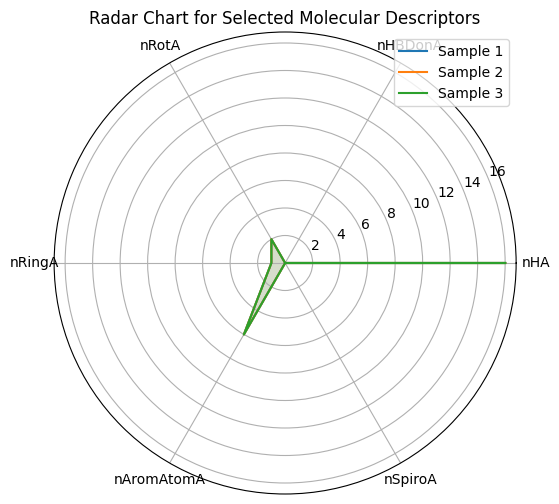

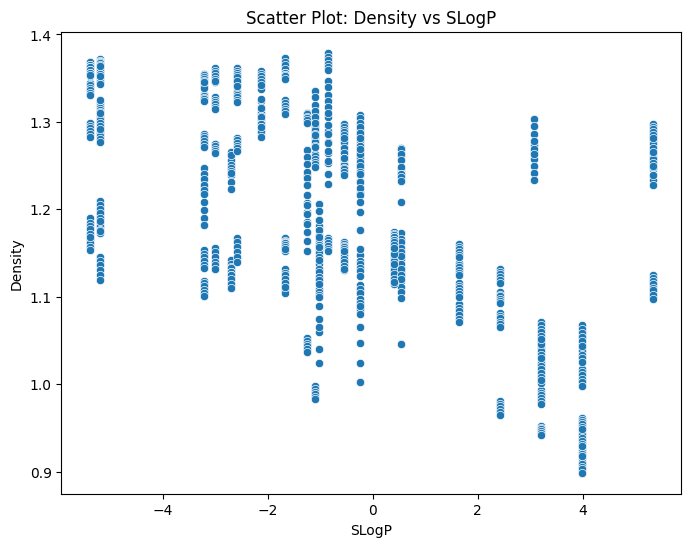

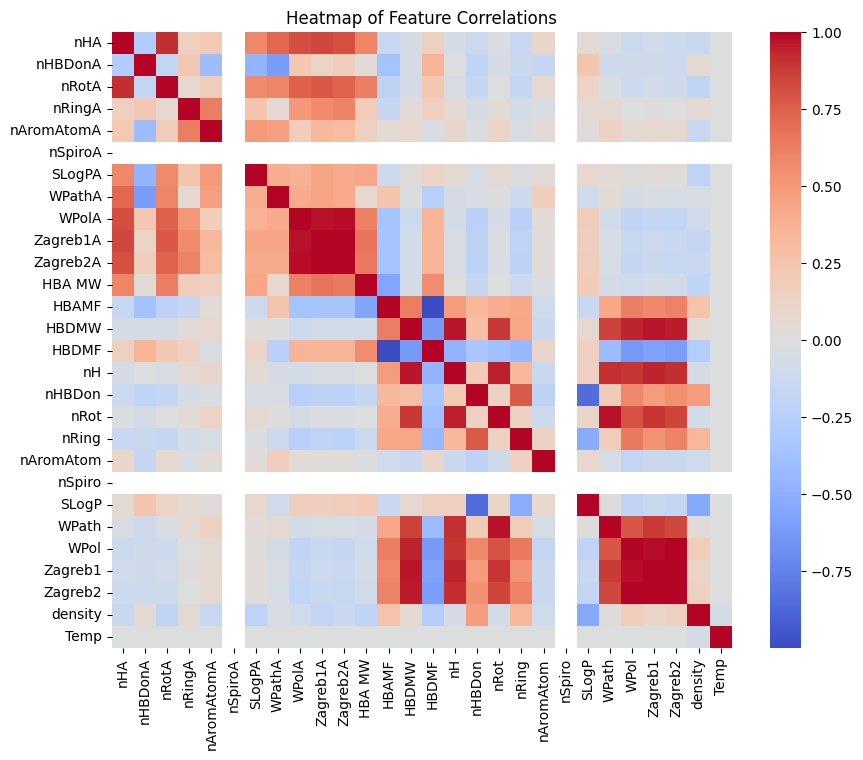

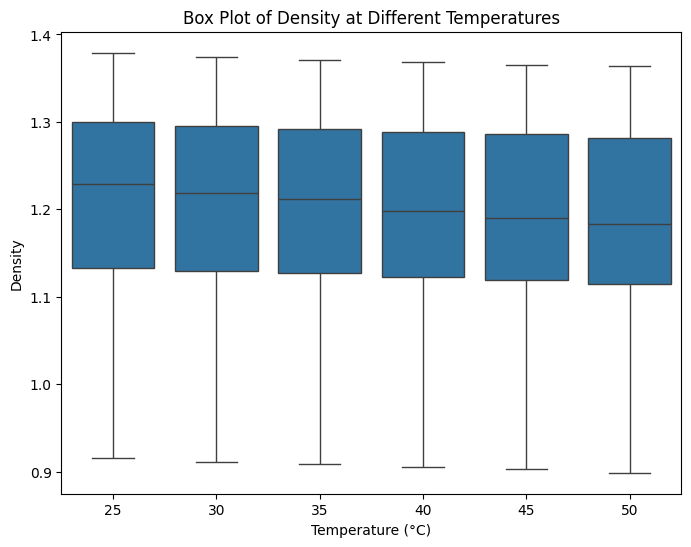

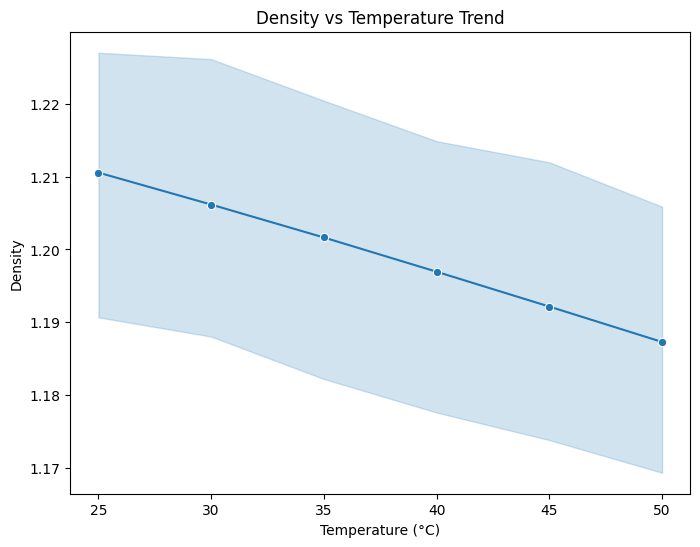

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :6]  # Taking first 3 rows and first 6 descriptors
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend()
    plt.title("Radar Chart for Selected Molecular Descriptors")
    plt.show()

radar_chart(selected_samples)

# Scatter Plot: Density vs SLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SLogP', y='density')
plt.xlabel('SLogP')
plt.ylabel('Density')
plt.title('Scatter Plot: Density vs SLogP')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Heatmap of Feature Correlations')
plt.show()

# Box Plot: Density at Different Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temp', y='density')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Box Plot of Density at Different Temperatures')
plt.show()

# Line Graph: Density vs Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temp', y='density', marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Density vs Temperature Trend')
plt.show()


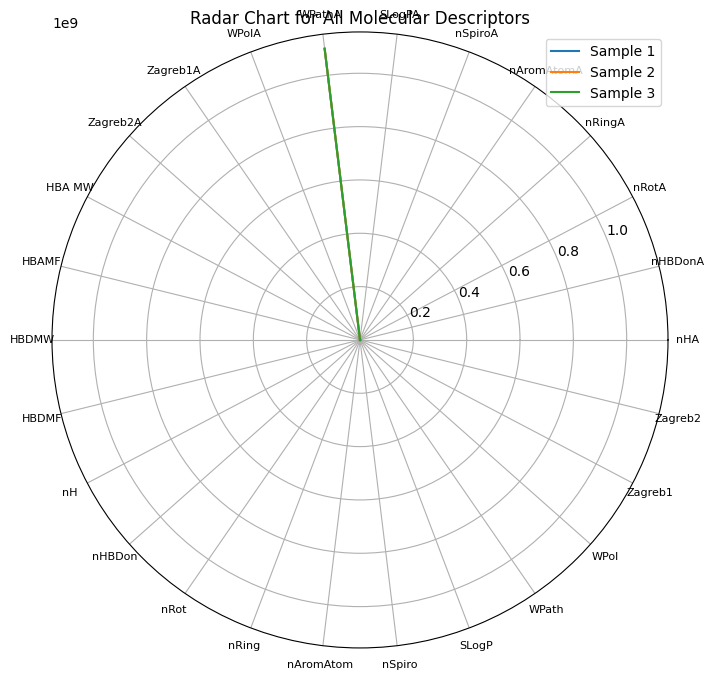

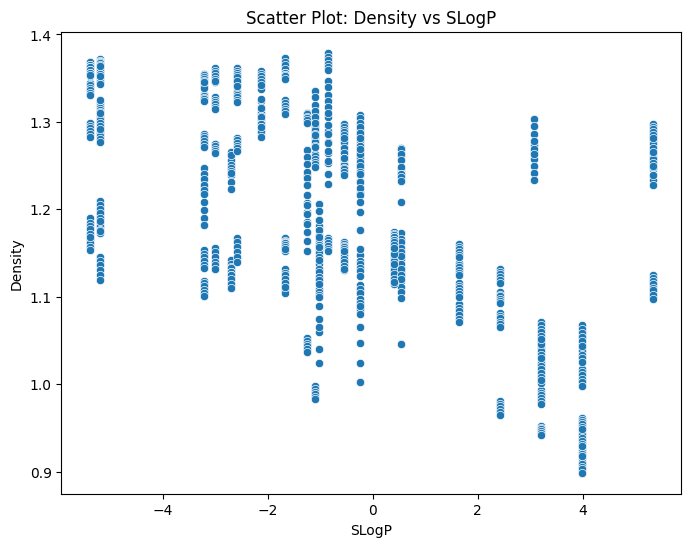

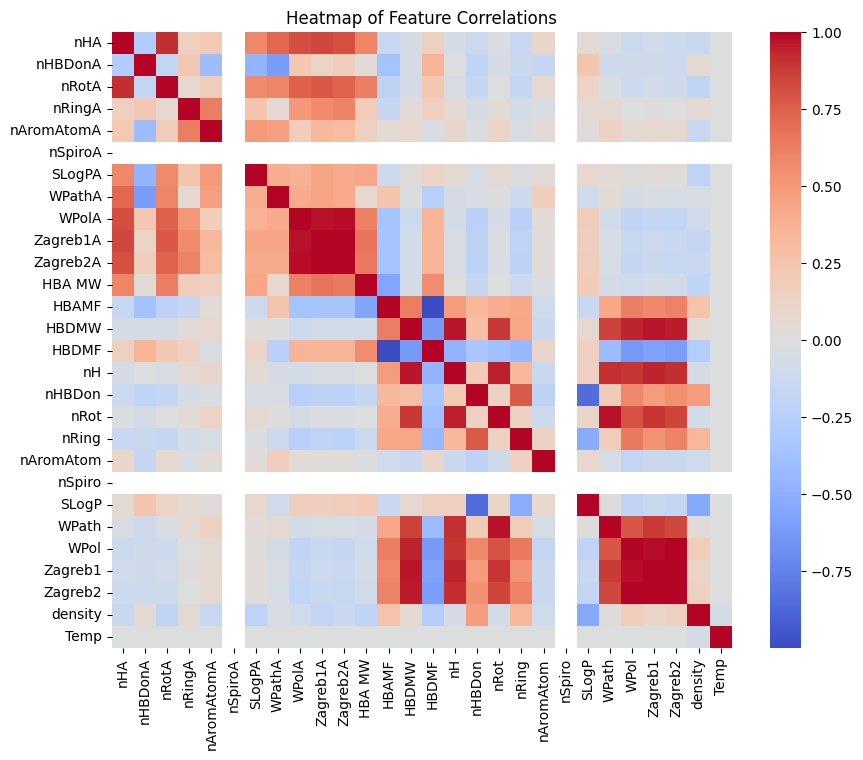

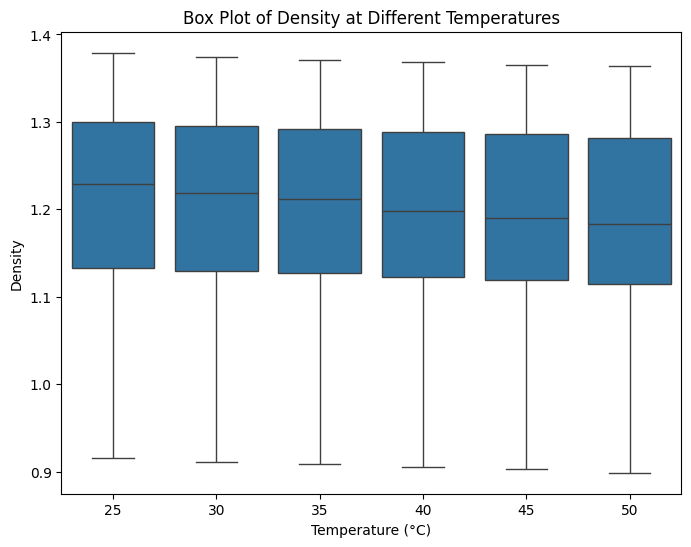

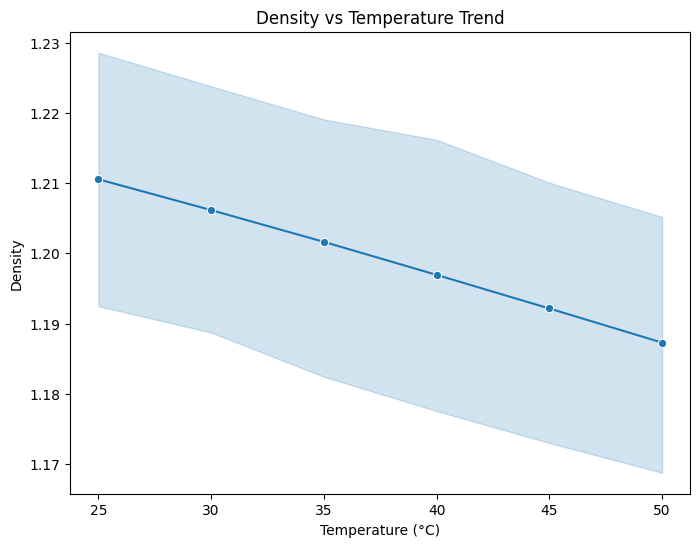

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8, rotation=45)
    ax.legend()
    plt.title("Radar Chart for All Molecular Descriptors")
    plt.show()

radar_chart(selected_samples)

# Scatter Plot: Density vs SLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SLogP', y='density')
plt.xlabel('SLogP')
plt.ylabel('Density')
plt.title('Scatter Plot: Density vs SLogP')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Heatmap of Feature Correlations')
plt.show()

# Box Plot: Density at Different Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temp', y='density')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Box Plot of Density at Different Temperatures')
plt.show()

# Line Graph: Density vs Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temp', y='density', marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Density vs Temperature Trend')
plt.show()


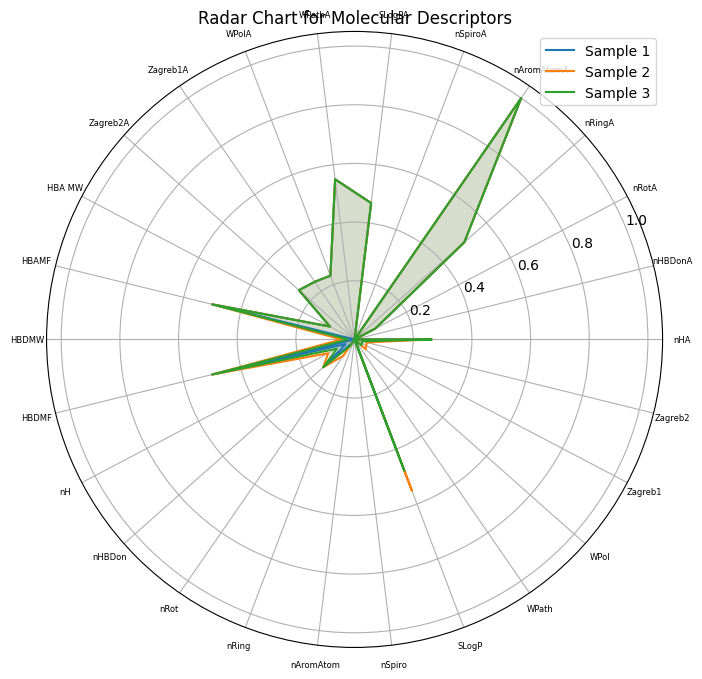

<ipython-input-3-beb441854461>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  pd.plotting.parallel_coordinates(df.iloc[:10], class_column='density', colormap=plt.cm.get_cmap("coolwarm"))


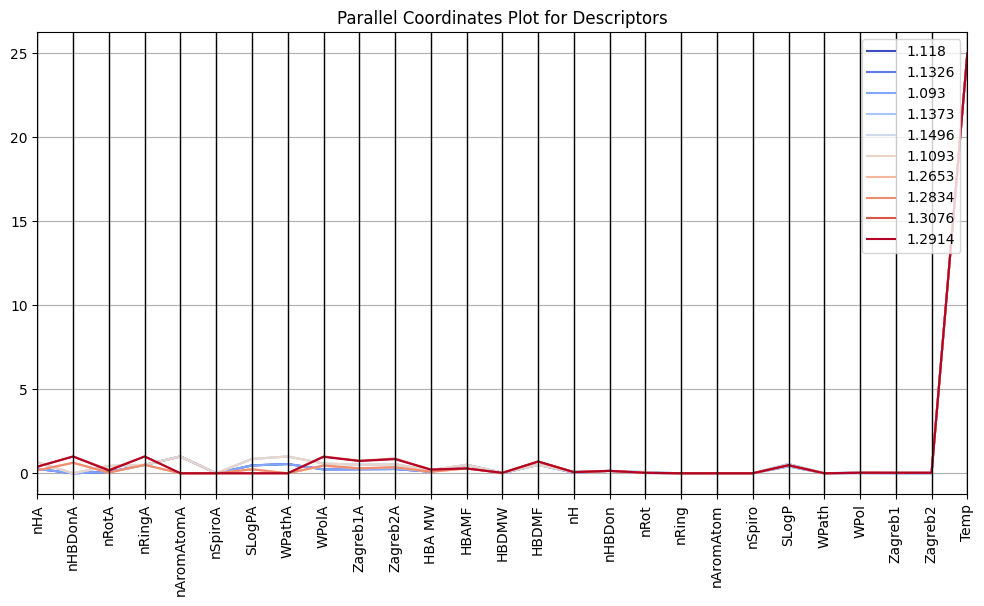

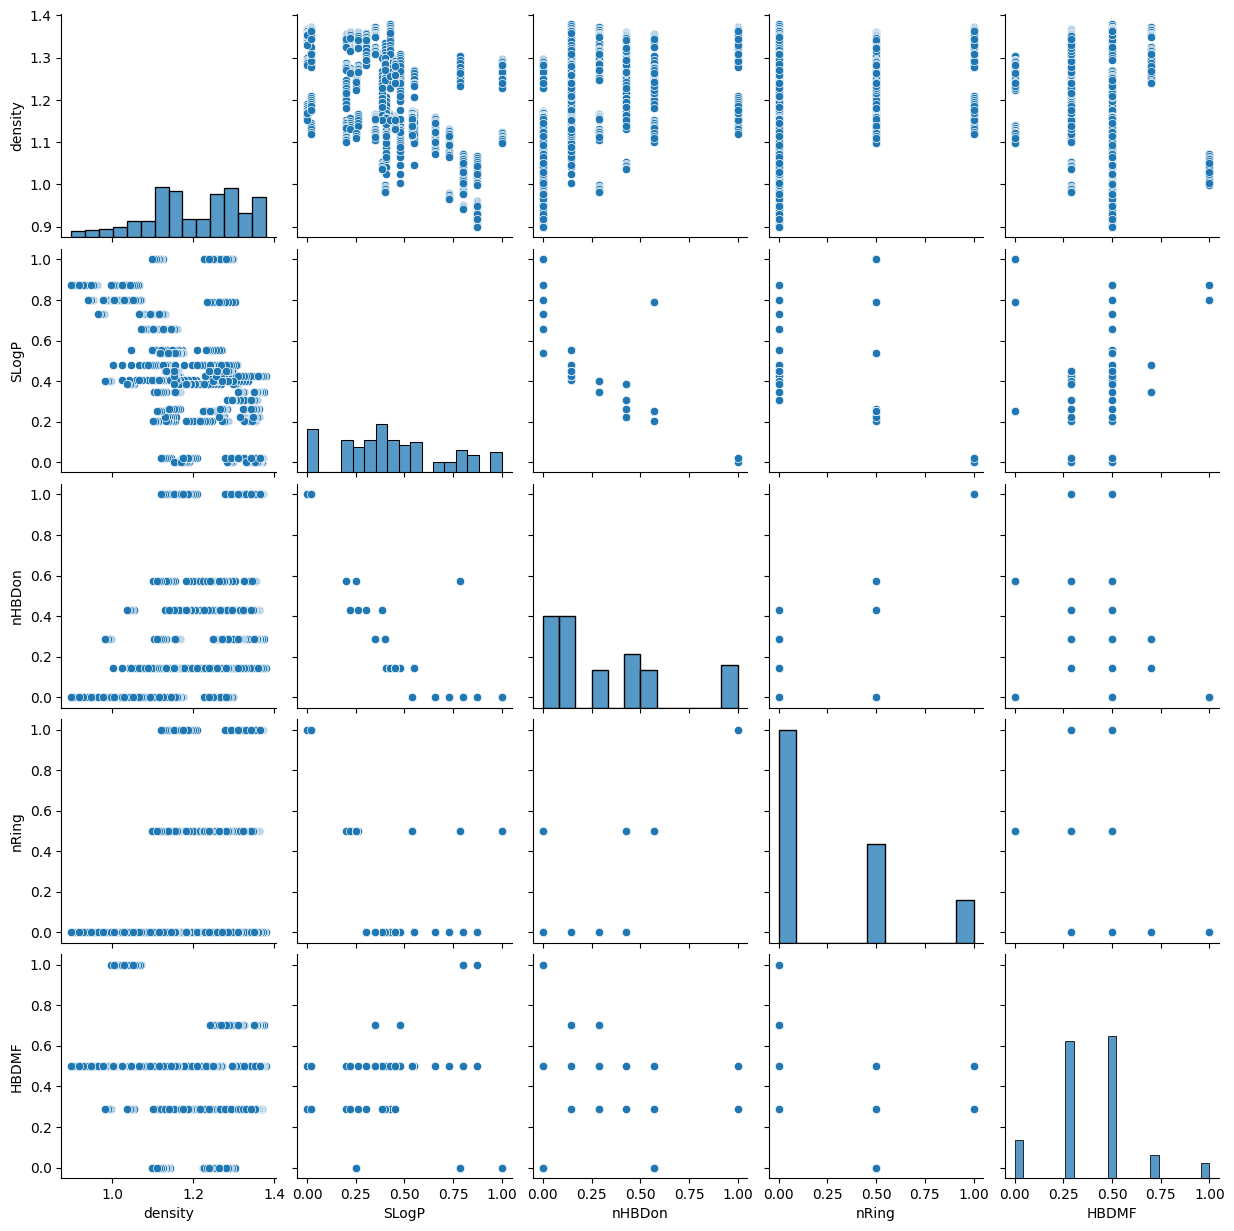

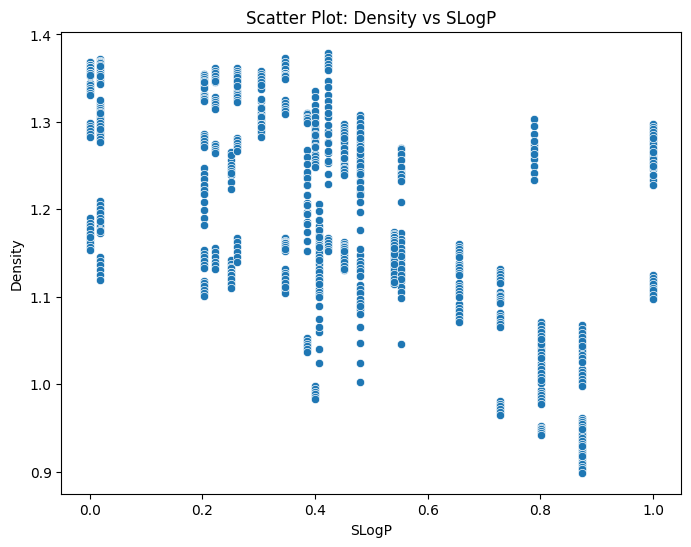

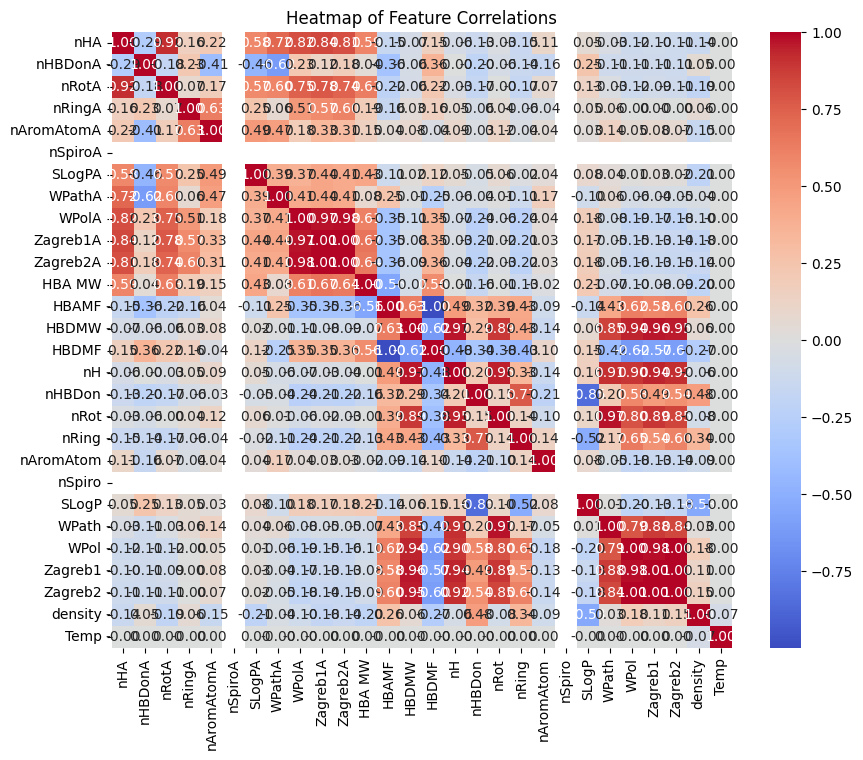

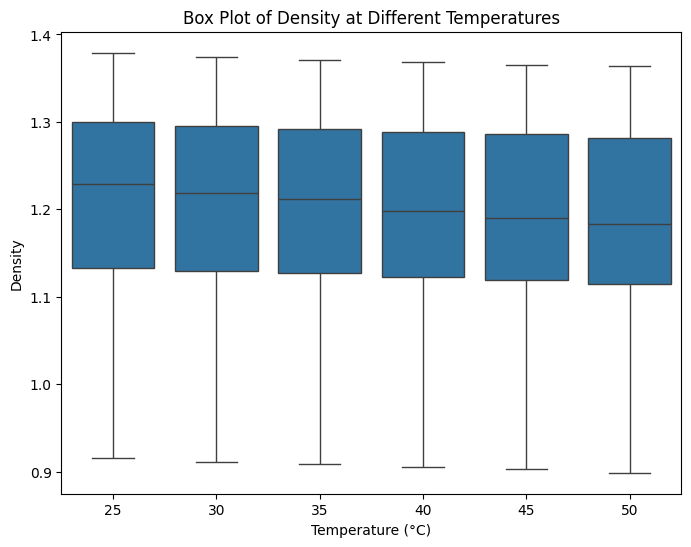

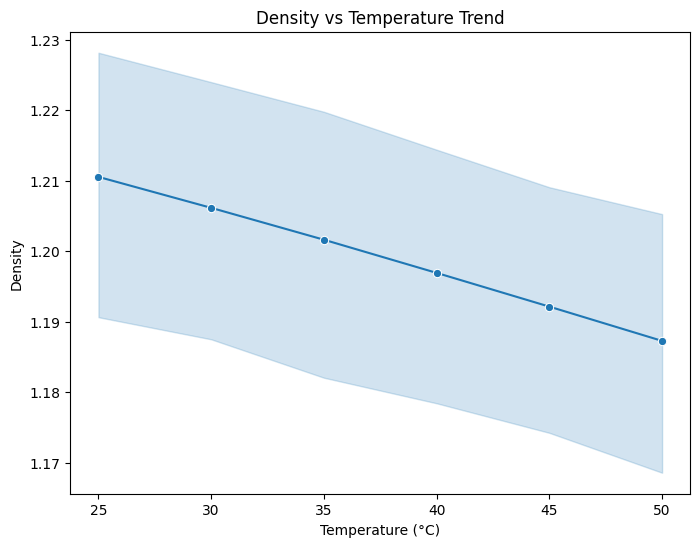

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Normalize the molecular descriptors
scaler = MinMaxScaler()
descriptor_columns = df.columns[:-2]  # Exclude target columns
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=6, rotation=90)
    ax.legend()
    plt.title("Radar Chart for Molecular Descriptors")
    plt.show()

radar_chart(selected_samples)

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df.iloc[:10], class_column='density', colormap=plt.cm.get_cmap("coolwarm"))
plt.xticks(rotation=90)
plt.title("Parallel Coordinates Plot for Descriptors")
plt.show()

# Pairplot for Density vs Top Features
top_features = df.corr()["density"].abs().sort_values(ascending=False).index[:5]
sns.pairplot(df[top_features])
plt.show()

# Scatter Plot: Density vs SLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SLogP', y='density')
plt.xlabel('SLogP')
plt.ylabel('Density')
plt.title('Scatter Plot: Density vs SLogP')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

# Box Plot: Density at Different Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temp', y='density')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Box Plot of Density at Different Temperatures')
plt.show()

# Line Graph: Density vs Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temp', y='density', marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Density vs Temperature Trend')
plt.show()

# 3D Scatter Plot
df_sample = df.iloc[:100]  # Reduce data size for better visualization
fig = px.scatter_3d(df_sample, x="SLogP", y="Temp", z="density", color="density", title="3D Scatter Plot of Density")
fig.show()


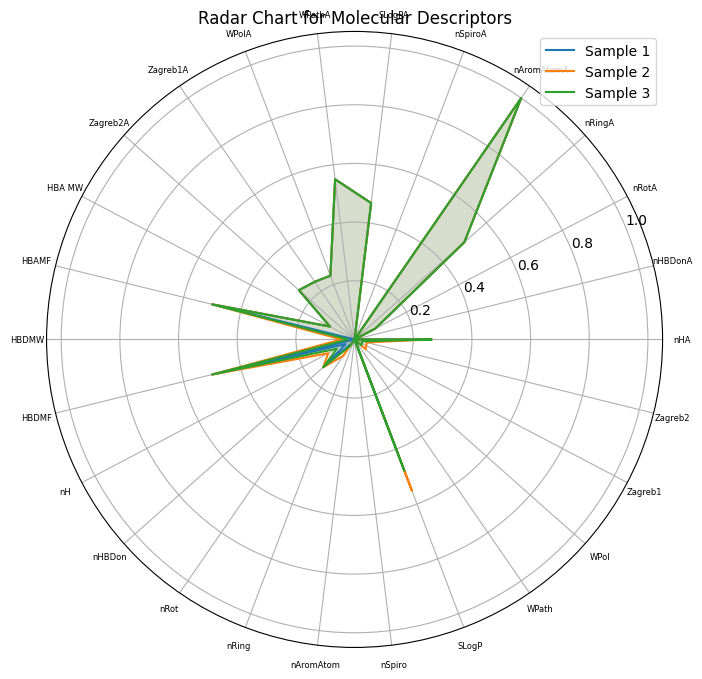

<ipython-input-4-beb441854461>:50: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



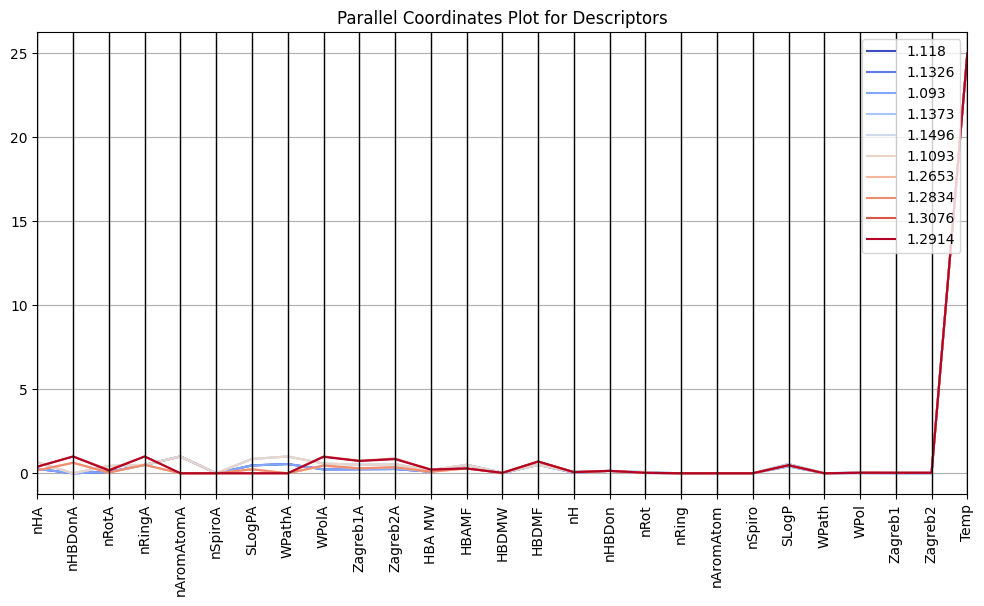

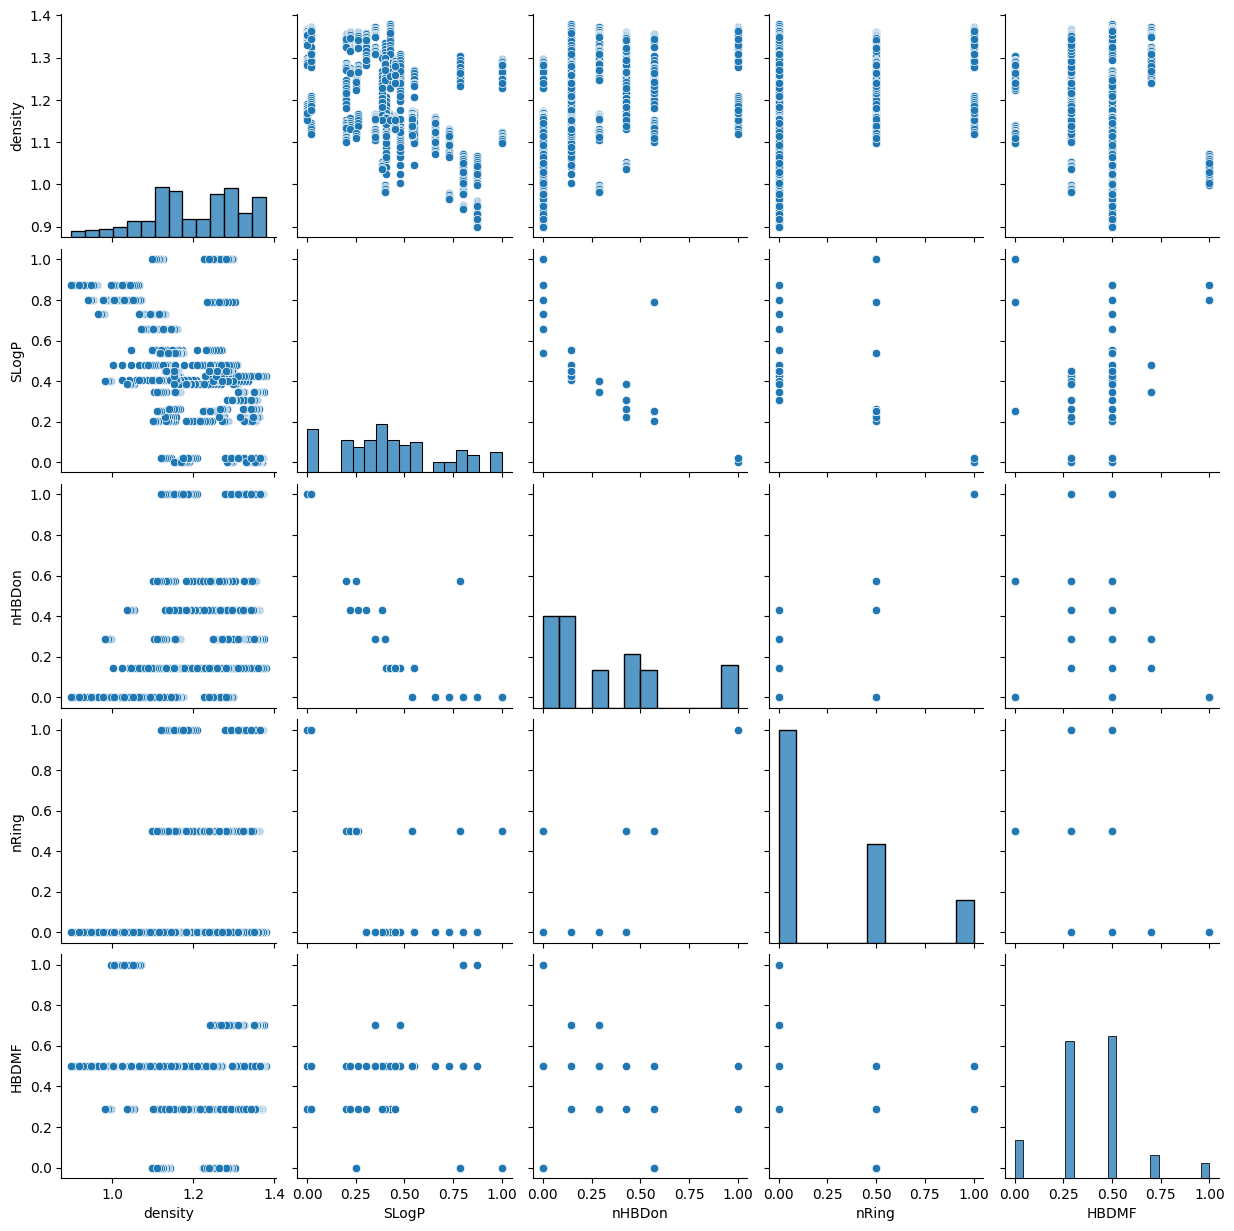

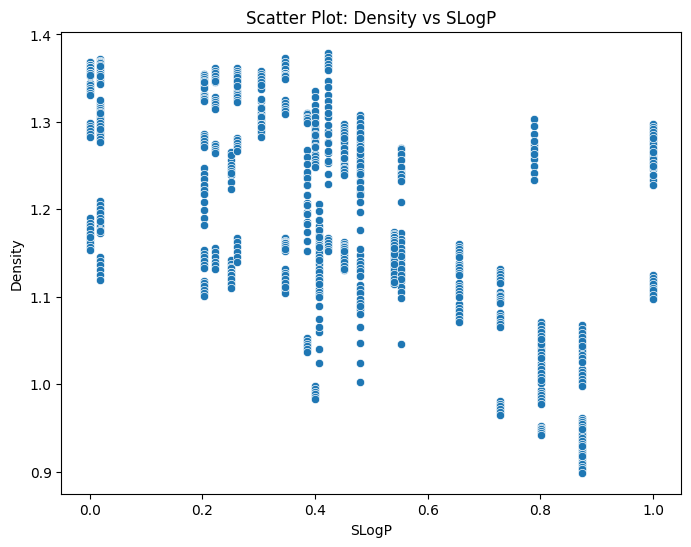

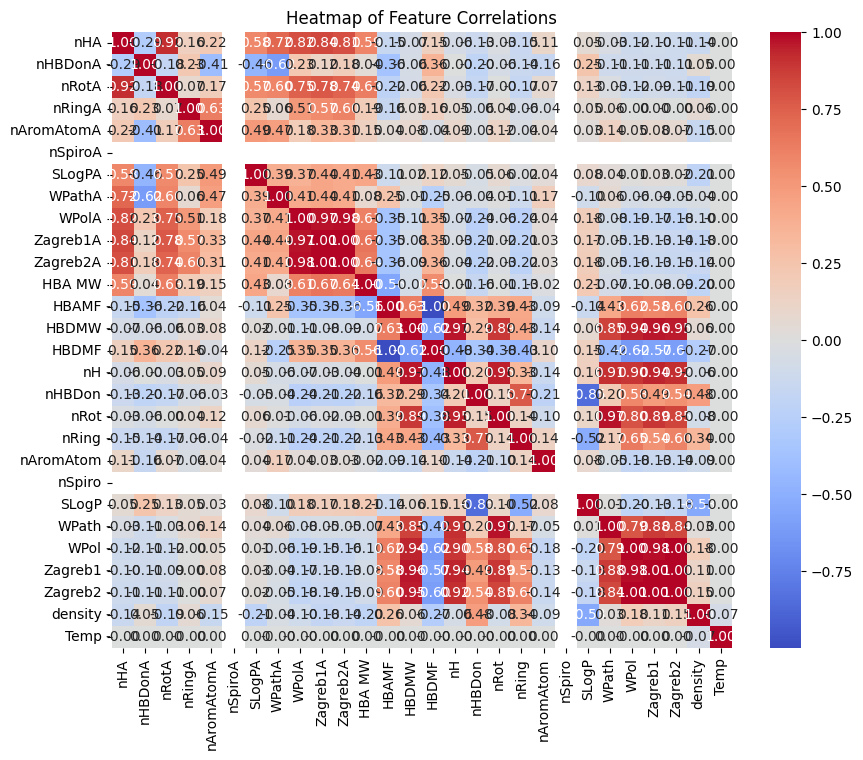

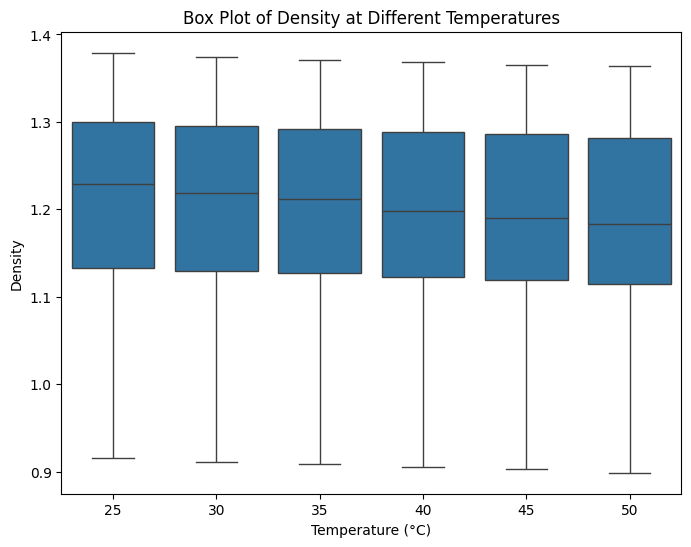

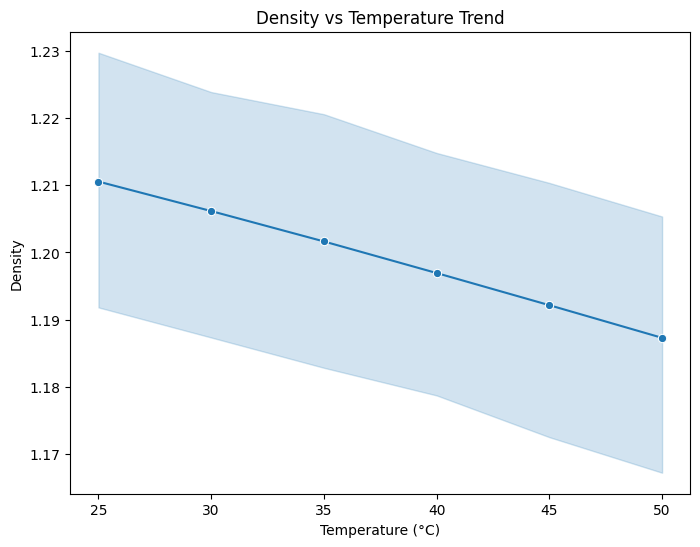

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Normalize the molecular descriptors
scaler = MinMaxScaler()
descriptor_columns = df.columns[:-2]  # Exclude target columns
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=6, rotation=90)
    ax.legend()
    plt.title("Radar Chart for Molecular Descriptors")
    plt.show()

radar_chart(selected_samples)

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df.iloc[:10], class_column='density', colormap=plt.cm.get_cmap("coolwarm"))
plt.xticks(rotation=90)
plt.title("Parallel Coordinates Plot for Descriptors")
plt.show()

# Pairplot for Density vs Top Features
top_features = df.corr()["density"].abs().sort_values(ascending=False).index[:5]
sns.pairplot(df[top_features])
plt.show()

# Scatter Plot: Density vs SLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SLogP', y='density')
plt.xlabel('SLogP')
plt.ylabel('Density')
plt.title('Scatter Plot: Density vs SLogP')
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

# Box Plot: Density at Different Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temp', y='density')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Box Plot of Density at Different Temperatures')
plt.show()

# Line Graph: Density vs Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temp', y='density', marker='o')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.title('Density vs Temperature Trend')
plt.show()

# 3D Scatter Plot
df_sample = df.iloc[:100]  # Reduce data size for better visualization
fig = px.scatter_3d(df_sample, x="SLogP", y="Temp", z="density", color="density", title="3D Scatter Plot of Density")
fig.show()


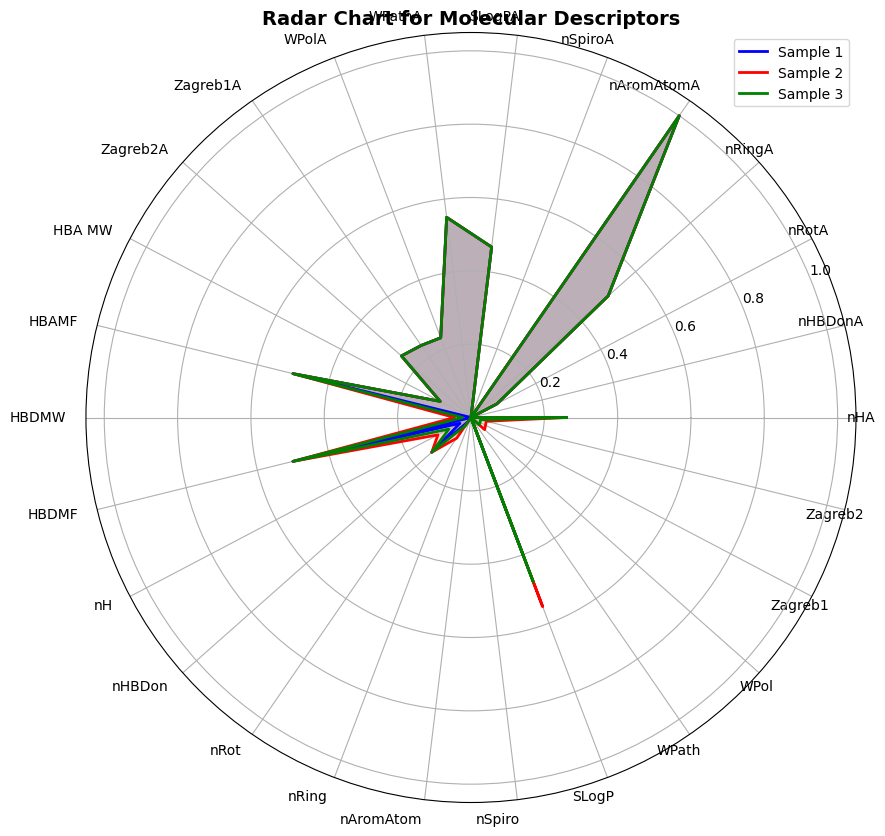

<ipython-input-5-ca33d73208d3>:53: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



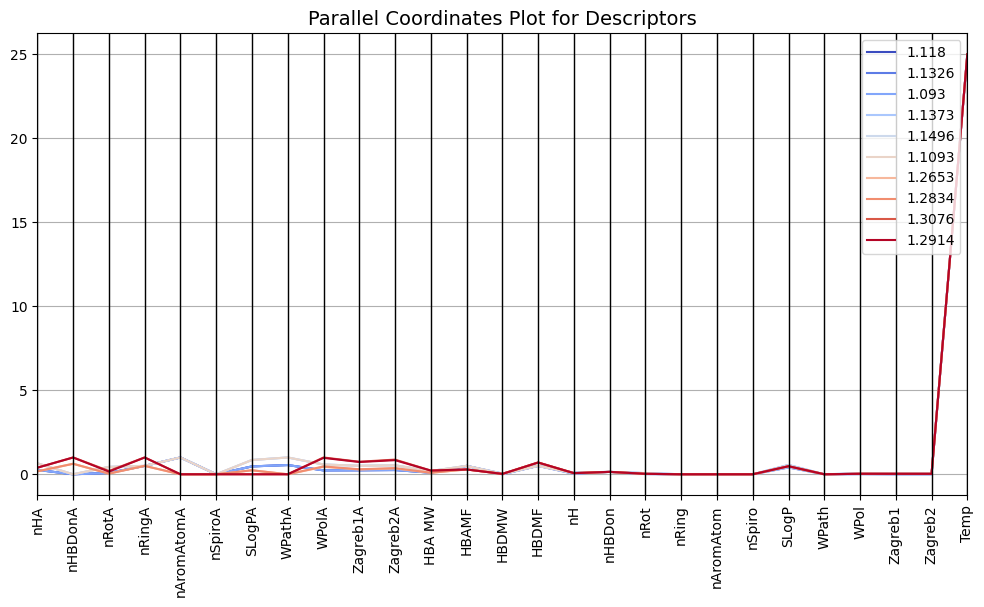

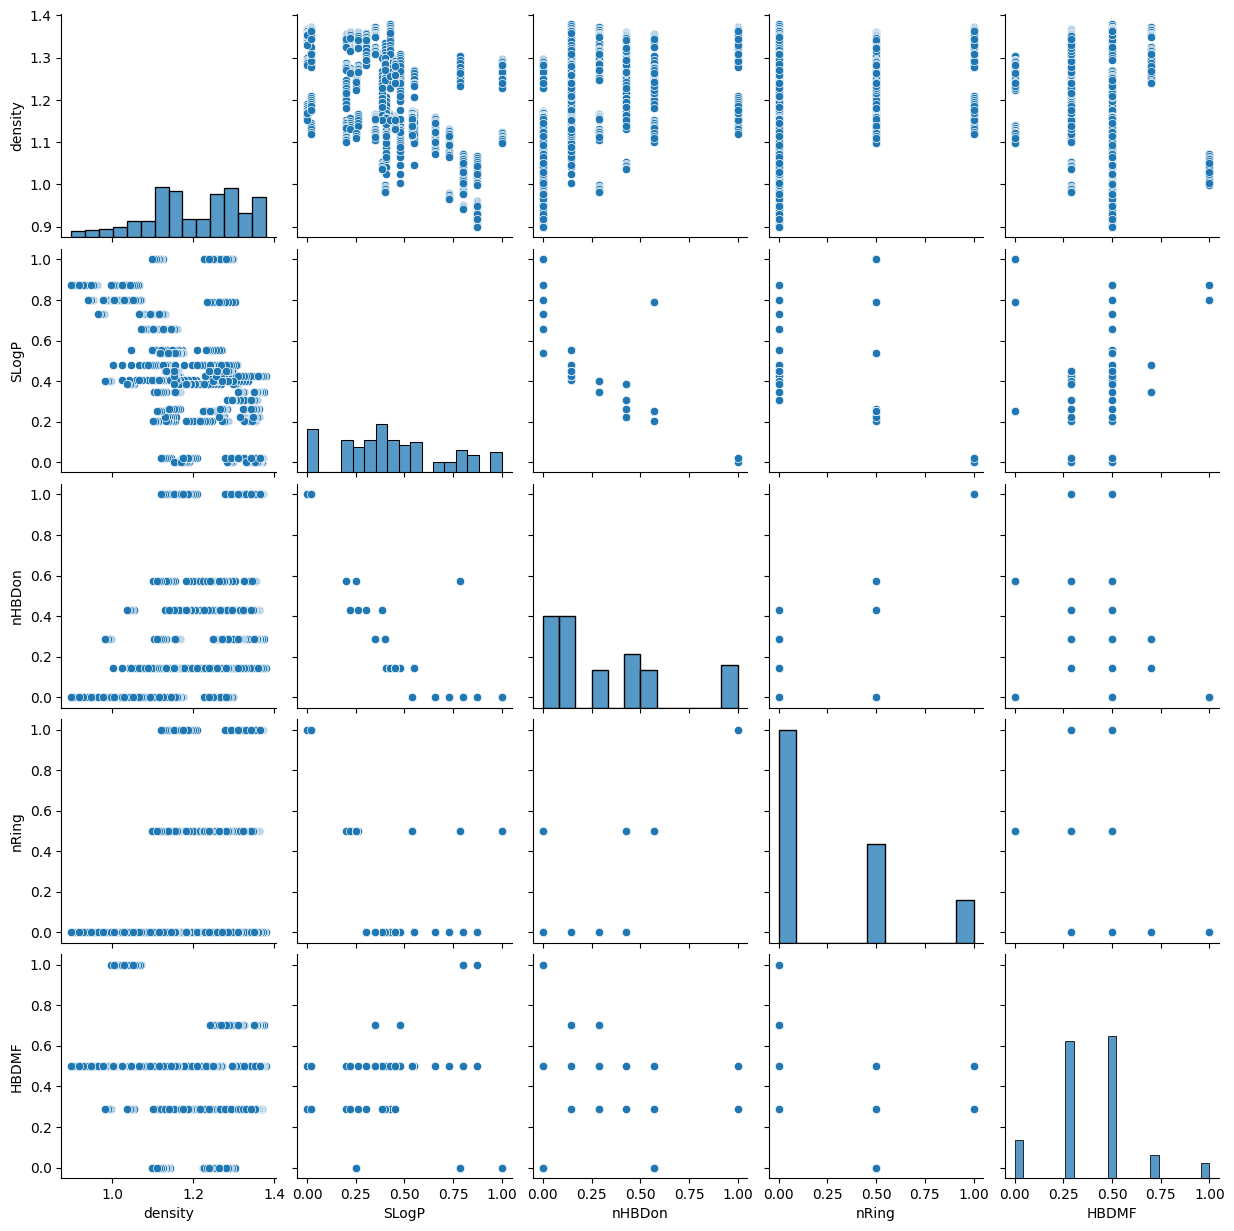

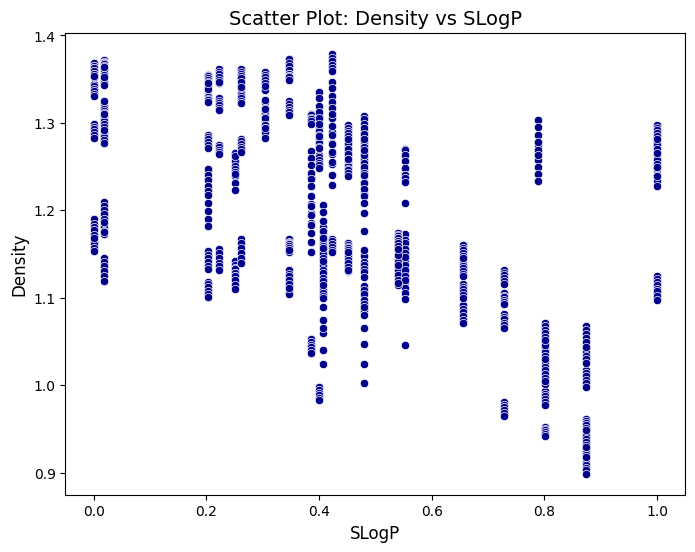

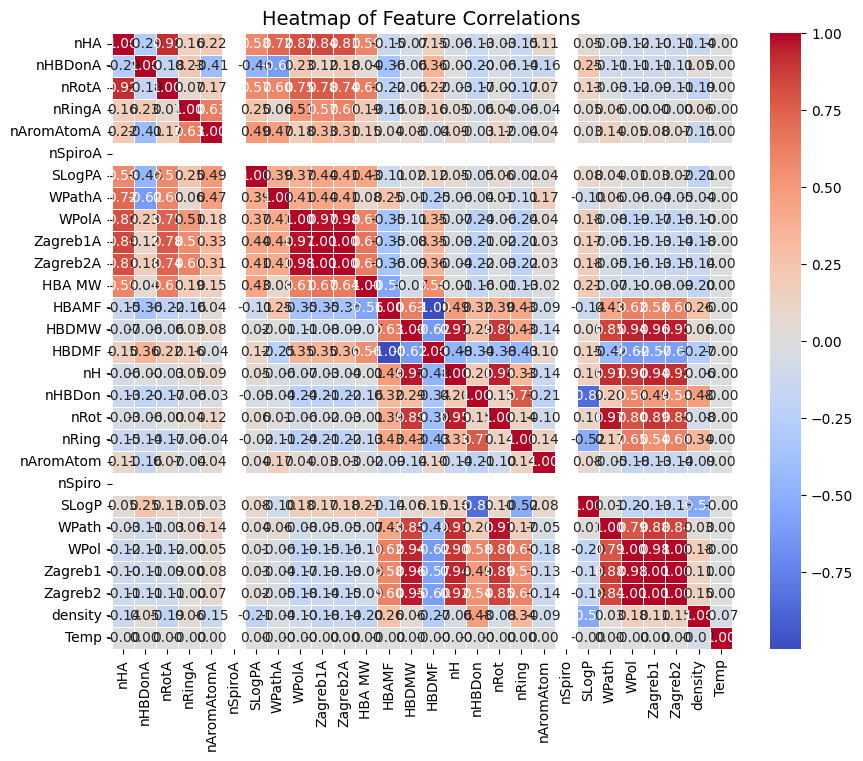

<ipython-input-5-ca33d73208d3>:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




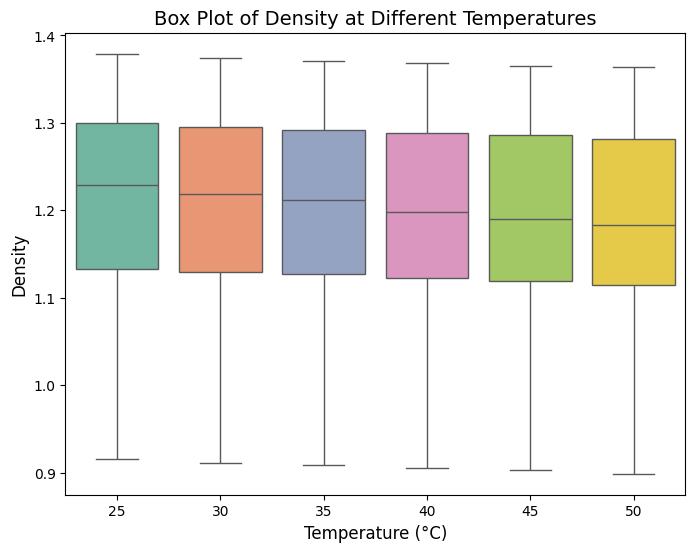

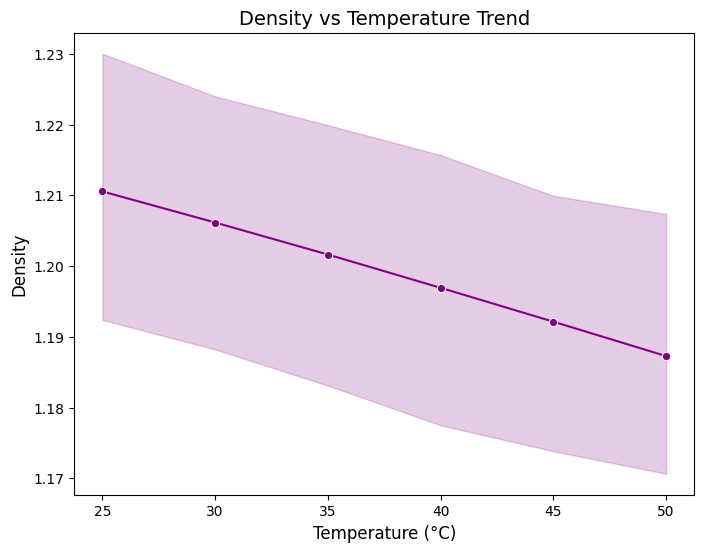

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Normalize the molecular descriptors
scaler = MinMaxScaler()
descriptor_columns = df.columns[:-2]  # Exclude target columns
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

    colors = ['b', 'r', 'g']  # Define contrasting colors
    fills = ['blue', 'red', 'green']

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, color=colors[i], linewidth=2, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.15, color=fills[i])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right')
    ax.legend(fontsize=10, loc='upper right')
    plt.title("Radar Chart for Molecular Descriptors", fontsize=14, fontweight='bold')
    plt.show()

radar_chart(selected_samples)

# Parallel Coordinates Plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df.iloc[:10], class_column='density', colormap=plt.cm.get_cmap("coolwarm"))
plt.xticks(rotation=90)
plt.title("Parallel Coordinates Plot for Descriptors", fontsize=14)
plt.show()

# Pairplot for Density vs Top Features
top_features = df.corr()["density"].abs().sort_values(ascending=False).index[:5]
sns.pairplot(df[top_features])
plt.show()

# Scatter Plot: Density vs SLogP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='SLogP', y='density', color='darkblue')
plt.xlabel('SLogP', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Scatter Plot: Density vs SLogP', fontsize=14)
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Feature Correlations', fontsize=14)
plt.show()

# Box Plot: Density at Different Temperatures
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Temp', y='density', palette='Set2')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Box Plot of Density at Different Temperatures', fontsize=14)
plt.show()

# Line Graph: Density vs Temperature
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Temp', y='density', marker='o', color='purple')
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density vs Temperature Trend', fontsize=14)
plt.show()

# 3D Scatter Plot
df_sample = df.iloc[:100]  # Reduce data size for better visualization
fig = px.scatter_3d(df_sample, x="SLogP", y="Temp", z="density", color="density", title="3D Scatter Plot of Density")
fig.show()


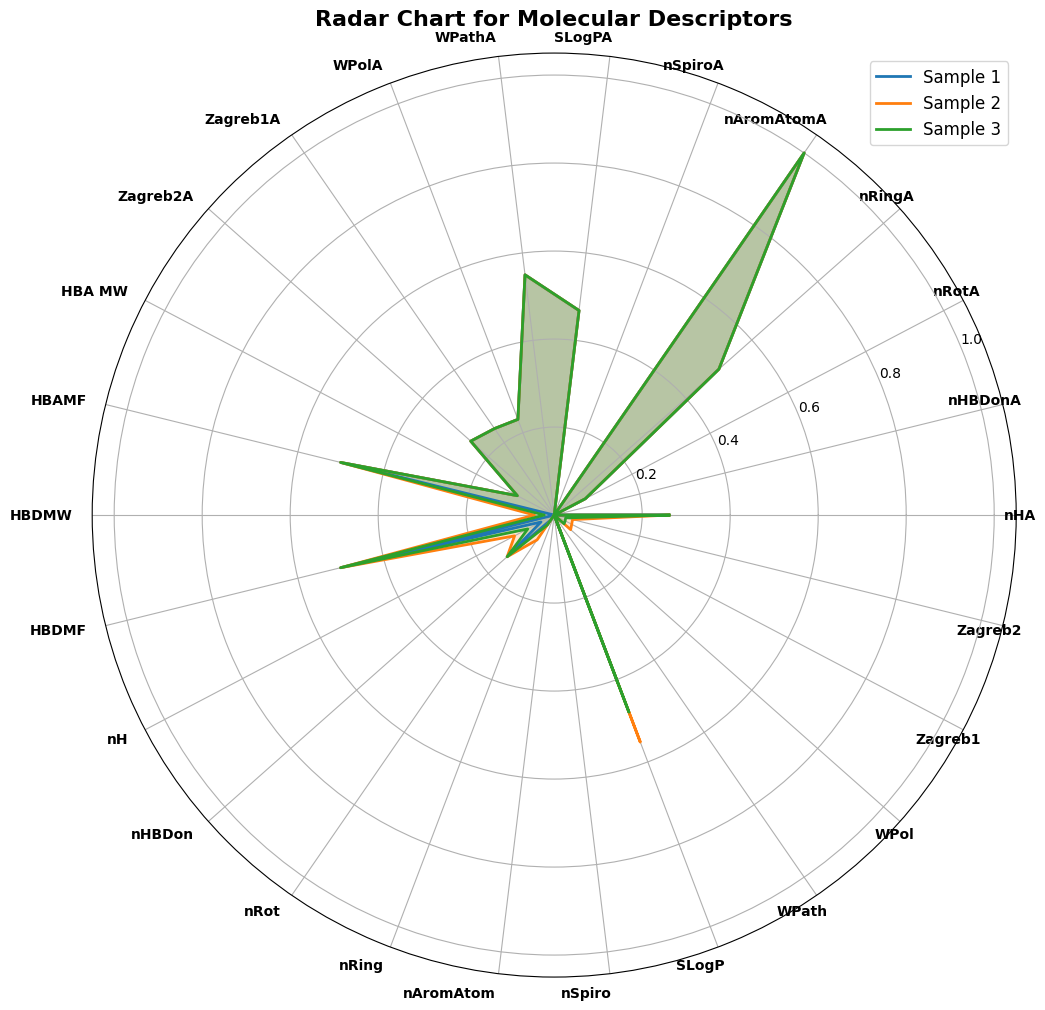

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Normalize the molecular descriptors
scaler = MinMaxScaler()
descriptor_columns = df.columns[:-2]  # Exclude target columns
df[descriptor_columns] = scaler.fit_transform(df[descriptor_columns])

# Select a few samples for radar chart
selected_samples = df.iloc[:3, :-2]  # Selecting all molecular descriptors
categories = list(selected_samples.columns)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create Radar Chart
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'polar': True})
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Using high-contrast colors
fills = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, row in selected_samples.iterrows():
    values = row.values.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f"Sample {i+1}")
    ax.fill(angles, values, alpha=0.2, color=fills[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right', fontweight='bold')
ax.legend(fontsize=12, loc='upper right')
plt.title("Radar Chart for Molecular Descriptors", fontsize=16, fontweight='bold', pad=20)
plt.show()


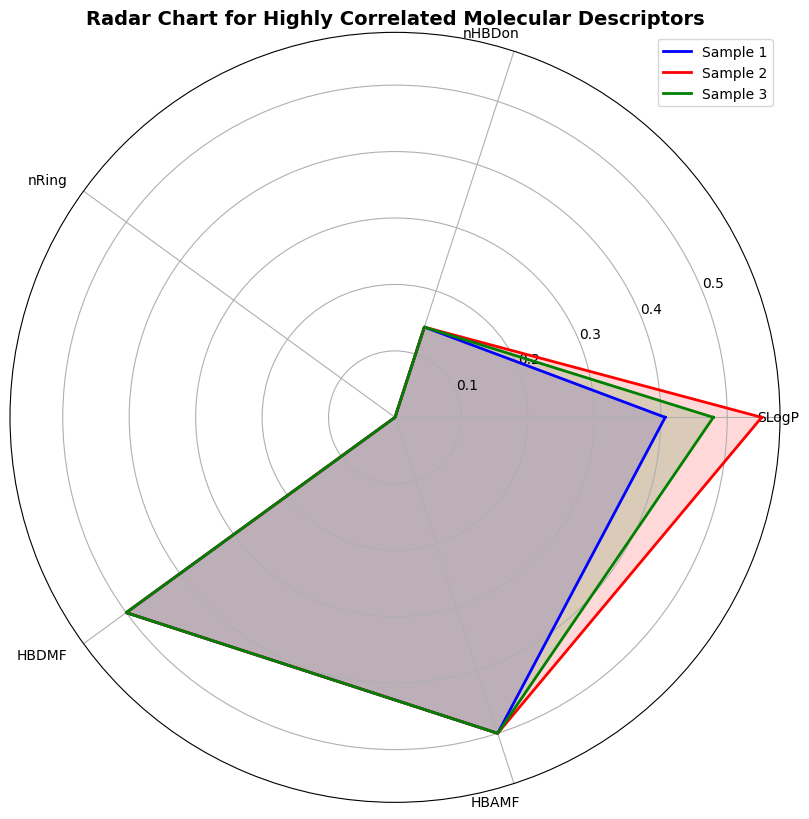

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Compute correlation with density
correlations = df.corr()["density"].abs().sort_values(ascending=False)

# Select top correlated descriptors (excluding density itself)
top_correlated_descriptors = correlations.index[1:6]  # Selecting top 5 descriptors

df_selected = df[top_correlated_descriptors]

# Normalize the selected descriptors
scaler = MinMaxScaler()
df_selected = pd.DataFrame(scaler.fit_transform(df_selected), columns=top_correlated_descriptors)

# Select a few samples for radar chart
selected_samples = df_selected.iloc[:3]  # Selecting first 3 samples
labels = selected_samples.columns

def radar_chart(data):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

    colors = ['b', 'r', 'g']  # Define contrasting colors
    fills = ['blue', 'red', 'green']

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, color=colors[i], linewidth=2, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.15, color=fills[i])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right')
    ax.legend(fontsize=10, loc='upper right')
    plt.title("Radar Chart for Highly Correlated Molecular Descriptors", fontsize=14, fontweight='bold')
    plt.show()

radar_chart(selected_samples)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.preprocessing import MinMaxScaler

def load_data(file_path):
    df = pd.read_csv(content/density.csv)
    return df

# Load dataset
file_path = "density.csv"  # Update with actual file path
df = load_data(file_path)

# Compute correlation with density
correlations = df.corr()["density"].abs().sort_values(ascending=False)

# Select top correlated descriptors (excluding density itself)
top_correlated_descriptors = correlations.index[1:11]  # Selecting top 10 descriptors

# Split into two groups for separate radar charts
group1 = top_correlated_descriptors[:5]
group2 = top_correlated_descriptors[5:]

# Normalize the selected descriptors
scaler = MinMaxScaler()
df_selected1 = pd.DataFrame(scaler.fit_transform(df[group1]), columns=group1)
df_selected2 = pd.DataFrame(scaler.fit_transform(df[group2]), columns=group2)

# Select a few samples for radar chart
selected_samples1 = df_selected1.iloc[:3]  # Selecting first 3 samples
selected_samples2 = df_selected2.iloc[:3]  # Selecting first 3 samples

def radar_chart(ax, data, title):
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Close the loop

    colors = ['b', 'r', 'g']  # Define contrasting colors
    fills = ['blue', 'red', 'green']

    for i, row in data.iterrows():
        values = row.values.tolist()
        values += values[:1]  # Close the loop
        ax.plot(angles, values, color=colors[i], linewidth=2, label=f"Sample {i+1}")
        ax.fill(angles, values, alpha=0.15, color=fills[i])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10, rotation=45, ha='right')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.legend(fontsize=8, loc='upper right')

fig, axs = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'polar': True})
radar_chart(axs[0], selected_samples1, "Radar Chart for Top 5 Correlated Descriptors (Group 1)")
radar_chart(axs[1], selected_samples2, "Radar Chart for Next 5 Correlated Descriptors (Group 2)")

plt.tight_layout()
plt.show()


NameError: name 'content' is not defined

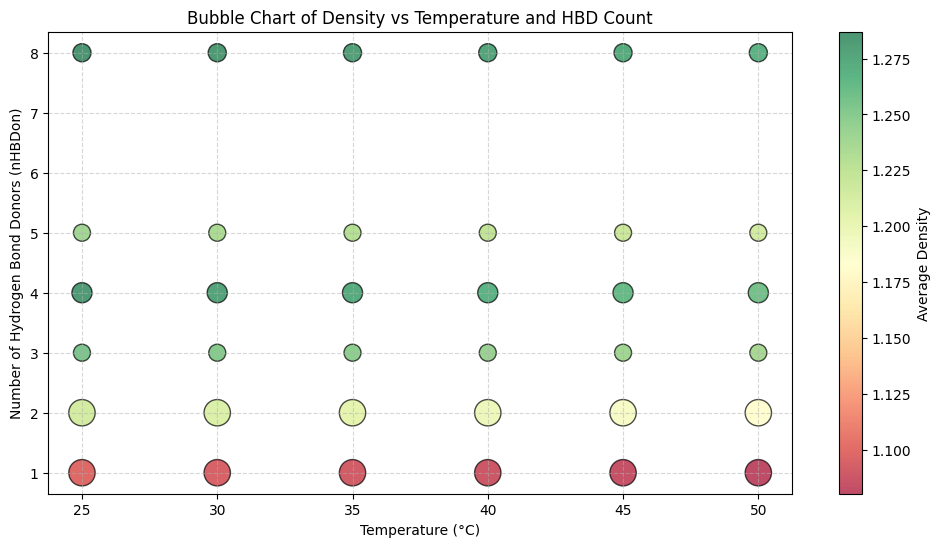

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
df = pd.read_csv("density.csv")

# Aggregate data to count occurrences and get mean density for each (Temp, nHBDon) pair
bubble_data = df.groupby(["Temp", "nHBDon"]).agg(
    count=("density", "size"),  # Bubble size based on count of data points
    avg_density=("density", "mean")  # Color based on average density
).reset_index()

# Create bubble chart
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    bubble_data["Temp"], bubble_data["nHBDon"],
    s=bubble_data["count"] * 10,  # Scale bubble sizes
    c=bubble_data["avg_density"], cmap="RdYlGn", alpha=0.7, edgecolors="black", marker="o"
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Average Density")

# Labels and title
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Hydrogen Bond Donors (nHBDon)")
plt.title("Bubble Chart of Density vs Temperature and HBD Count")

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
